- NVDA Nvidia Corp and AMD Advanced Micro Devices Inc -> Technology Sector
- Exxon Mobil (NYSE:XOM) and Chevron (NYSE:CVX) -> Energy Sector
- Johnson & Johnson (NYSE:JNJ) and Pfizer (NYSE:PFE) -> Health Care Sector

### 1) Sommario dati utilizzati

Importo le librerie necessarie per l'analisi dei dati e per la visualizzazione dei grafici.

In [86]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.dates as mdates
import seaborn as sns
import pyfolio as pf
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [87]:
start_date = '2012-11-30'
end_date = '2022-11-30'

dataframe_complete= yf.download(['NVDA','AMD','XOM','CVX','JNJ','PFE'], start_date, end_date)
#dataframe_complete= dataframe_complete.replace(np.nan, 0)

[*********************100%***********************]  6 of 6 completed


Creazione del dataframe delle adjusted close price.

In [88]:
dataframe=dataframe_complete['Adj Close']
#dataframe = pd.DataFrame({'NVDA': NVDA['Adj Close'], 'AMD': AMD['Adj Close'], 'XOM': XOM['Adj Close'], 'CVX': CVX['Adj Close'], 'JNJ': JNJ['Adj Close'], 'PFE': PFE['Adj Close']}) # create a dataframe with the adjusted close prices of the stocks
#dataframe = dataframe.dropna() # drop rows with missing values
dataframe


AMD         CVX         JNJ        NVDA        PFE  \
Date                                                                   
2012-11-30   2.200000   69.891785   53.113289    2.764092  16.596138   
2012-12-03   2.360000   69.210670   53.052322    2.713290  16.642570   
2012-12-04   2.260000   68.747757   53.212303    2.794112  16.695635   
2012-12-05   2.290000   69.547920   53.296074    2.761783  17.007393   
2012-12-06   2.340000   70.394379   53.357018    2.766401  16.987494   
...               ...         ...         ...         ...        ...   
2022-11-22  75.250000  185.889999  176.820007  160.338989  49.080002   
2022-11-23  76.400002  184.240005  177.009995  165.147751  48.849998   
2022-11-25  75.139999  183.699997  177.240005  162.658386  49.209999   
2022-11-28  73.190002  178.360001  177.330002  158.229523  49.570000   
2022-11-29  73.389999  181.029999  176.089996  156.350006  49.490002   

                   XOM  
Date                    
2012-11-30   57.710155  
2012-12-03   57.363140  
2012-12-04   57.088146  
2012-12-05   57.441692  
2012-12-06   57.618473  
...                ...  
2022-11-22  114.180000  
2022-11-23  113.610001  
2022-11-25  113.209999  
2022-11-28  109.809998  
2022-11-29  110.540001  

[2517 rows x 6 columns]

<AxesSubplot:title={'center':'Prezzi chiusura azioni'}, xlabel='Data', ylabel='Prezzo chiusura'>

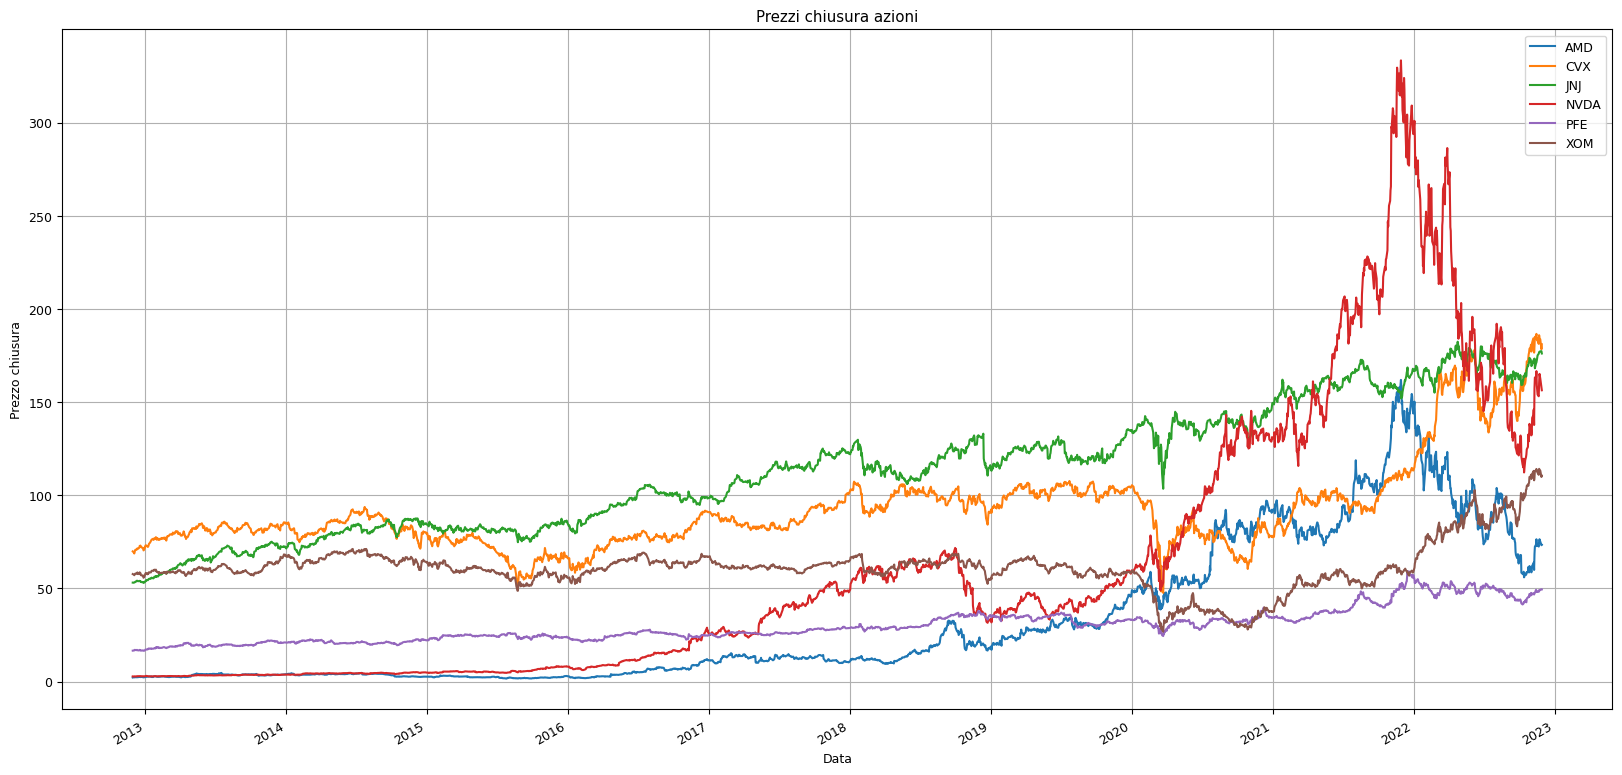

In [89]:
dataframe.plot(figsize=(20, 10), grid=True, title='Prezzi chiusura azioni', xlabel='Data', ylabel='Prezzo chiusura')

### 2) Statistiche descrittive

Rendimento cumulato e composto

In [90]:
rendimento_cumulato_annuo= dataframe.tail(1).iloc[0]/dataframe.head(1).iloc[0]
rendimento_composto_annuo=pow(rendimento_cumulato_annuo,(1/10))-1

print("Rendimento cumulato: ")
print(rendimento_cumulato_annuo)

print("\nRendimento composto annuo: ")
rendimento_composto_annuo

Rendimento cumulato: 
AMD     33.359090
CVX      2.590147
JNJ      3.315366
NVDA    56.564695
PFE      2.982019
XOM      1.915434
dtype: float64

Rendimento composto annuo: 


AMD     0.420108
CVX     0.099847
JNJ     0.127335
NVDA    0.497113
PFE     0.115452
XOM     0.067153
dtype: float64

Rendimento semplice annuo

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>]], dtype=object)

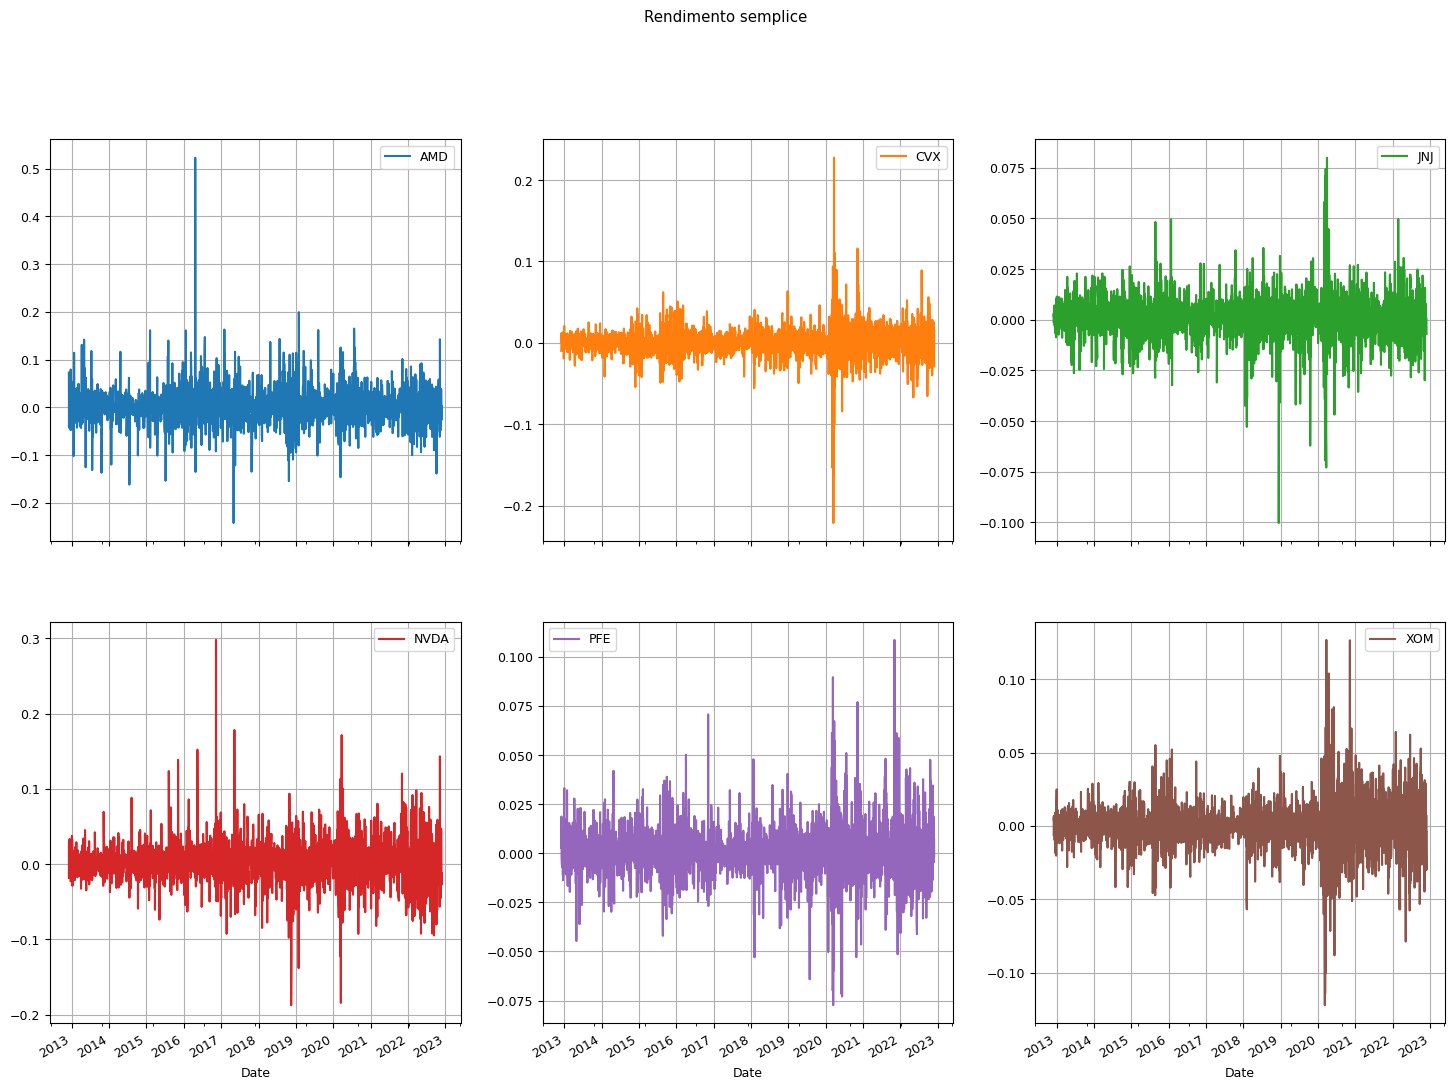

In [91]:
rendimento_semplice= dataframe.pct_change()
rendimento_semplice.plot(figsize=(18, 13), grid=True, title='Rendimento semplice', subplots=True, layout=(2, 3))

Rendimento logaritmico annuo

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>]], dtype=object)

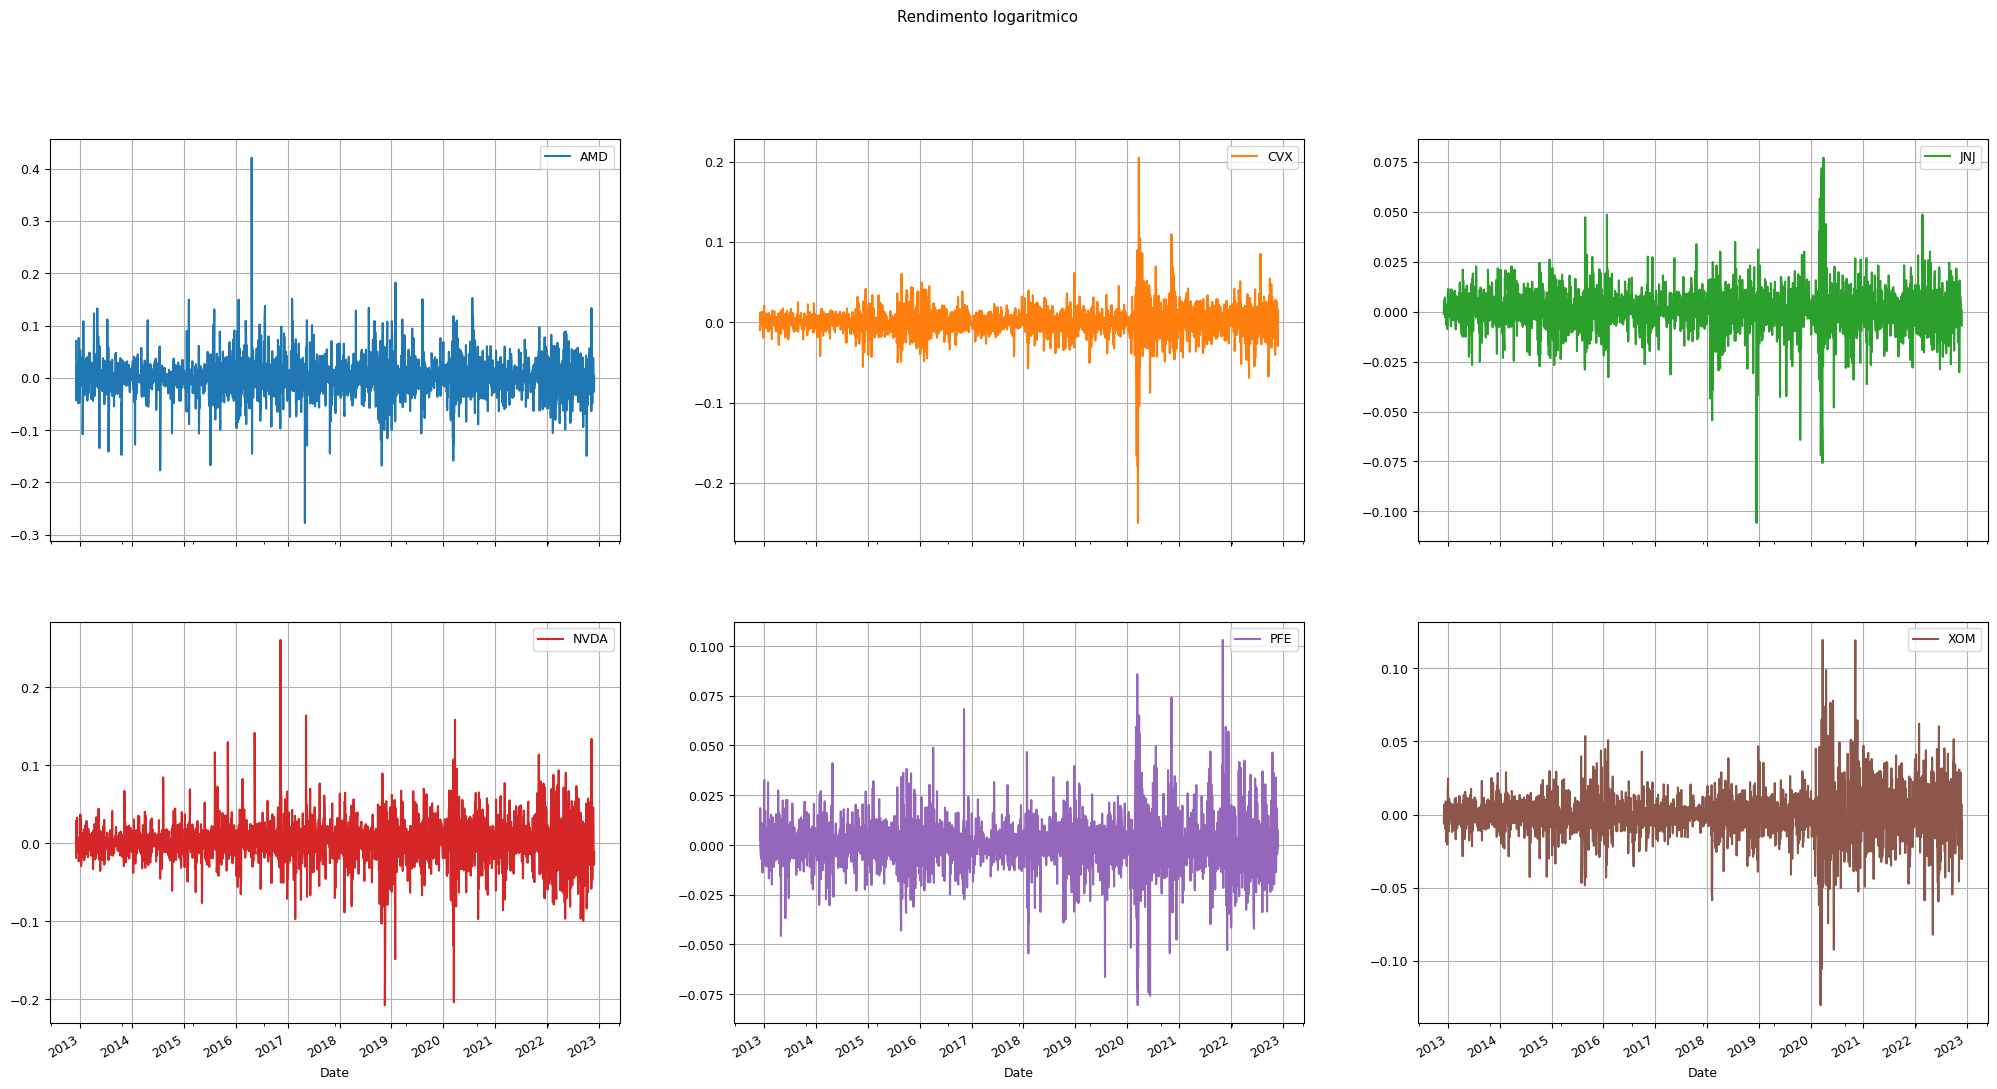

In [92]:
rendimento_logaritmico = np.log(rendimento_semplice+1).dropna()
rendimento_logaritmico.plot(figsize=(25, 13), grid=True, title='Rendimento logaritmico', subplots=True, layout=(2, 3))

Istogramma dei rendimenti e la loro distribuzione

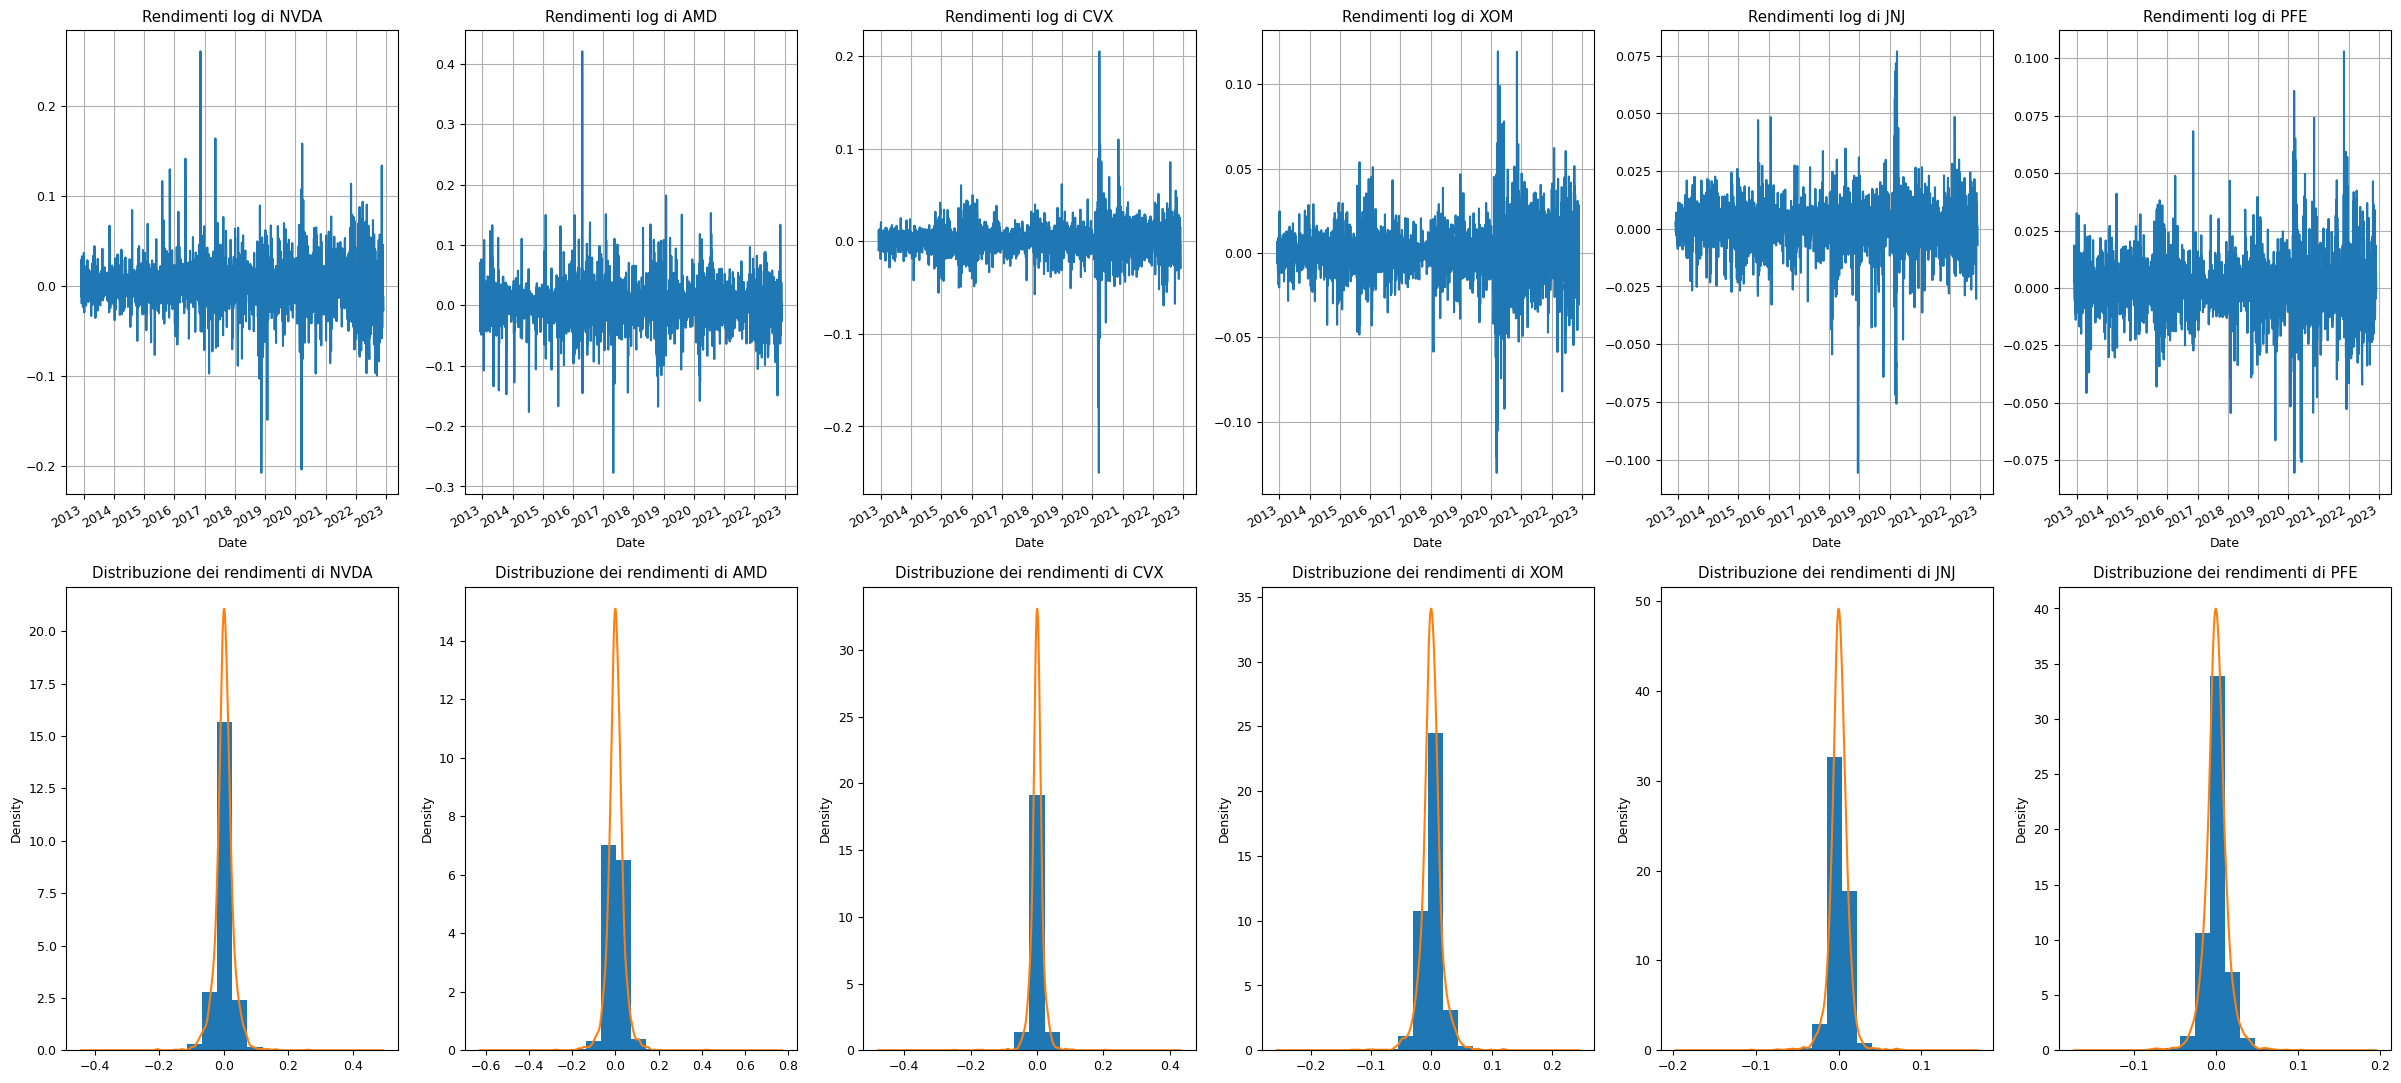

In [93]:
#rendimento_logaritmico.hist(bins=50,  grid=False, density=True, layout=(2,3), figsize=(25, 8), zorder=1, rwidth=0.9, range=(-0.3, 0.3))
#rendimento_logaritmico.plot.density()

plt.figure(figsize=(30,15))
plt.rc('font', size=9)

plt.subplot(261)
rendimento_logaritmico['NVDA'].plot(grid=True, title = 'Rendimenti log di NVDA')
plt.subplot(262)
rendimento_logaritmico['AMD'].plot(grid=True, title = 'Rendimenti log di AMD')
plt.subplot(263)
rendimento_logaritmico['CVX'].plot(grid=True, title = 'Rendimenti log di CVX')
plt.subplot(264)
rendimento_logaritmico['XOM'].plot(grid=True, title = 'Rendimenti log di XOM')
plt.subplot(265)
rendimento_logaritmico['JNJ'].plot(grid=True, title = 'Rendimenti log di JNJ')
plt.subplot(266)
rendimento_logaritmico['PFE'].plot(grid=True, title = 'Rendimenti log di PFE')

plt.subplot(267)
plt.hist(rendimento_logaritmico['NVDA'], density = True)
plt.title('Distribuzione dei rendimenti di NVDA')
rendimento_logaritmico['NVDA'].plot.density()
plt.subplot(268)
plt.hist(rendimento_logaritmico['AMD'], density = True)
plt.title('Distribuzione dei rendimenti di AMD')
rendimento_logaritmico['AMD'].plot.density();
plt.subplot(269)
plt.hist(rendimento_logaritmico['CVX'], density = True)
plt.title('Distribuzione dei rendimenti di CVX')
rendimento_logaritmico['CVX'].plot.density()
plt.subplot(2,6,10)
plt.hist(rendimento_logaritmico['XOM'], density = True)
plt.title('Distribuzione dei rendimenti di XOM')
rendimento_logaritmico['XOM'].plot.density();
plt.subplot(2,6,11)
plt.hist(rendimento_logaritmico['JNJ'], density = True)
plt.title('Distribuzione dei rendimenti di JNJ')
rendimento_logaritmico['JNJ'].plot.density();
plt.subplot(2,6,12)
plt.hist(rendimento_logaritmico['PFE'], density = True)
plt.title('Distribuzione dei rendimenti di PFE')
rendimento_logaritmico['PFE'].plot.density();


Dispersione dei rendimenti

In [94]:
dispersione_rendimenti = rendimento_logaritmico.std() #dispersione rendimenti
dispersione_rendimenti

AMD     0.036327
CVX     0.018264
JNJ     0.011146
NVDA    0.027578
PFE     0.013768
XOM     0.016835
dtype: float64

### Grafici rendimenti logaritmici di ciascun titolo

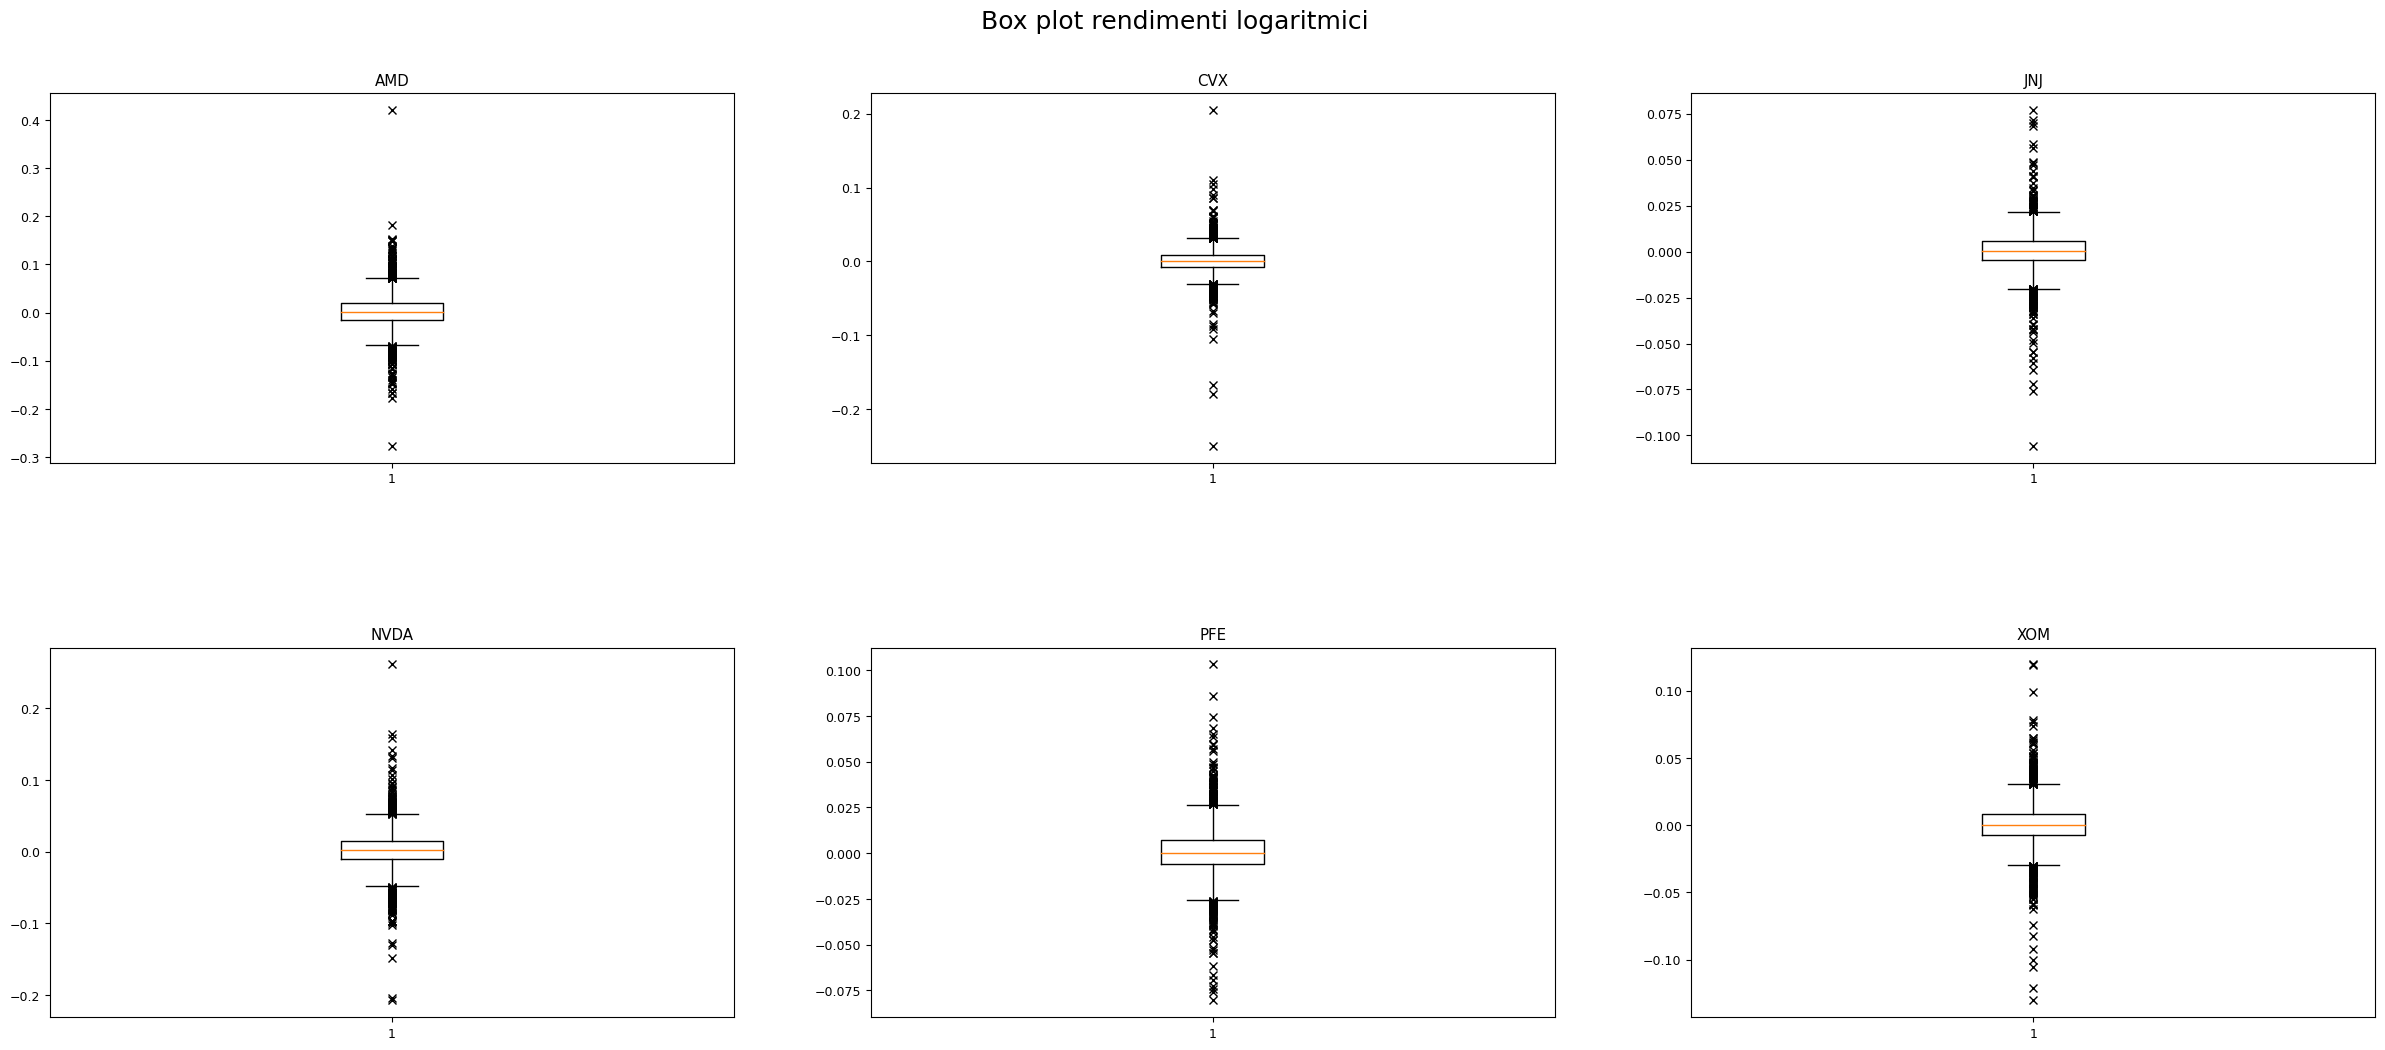

In [95]:
plt.figure(figsize=(30, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Box plot rendimenti logaritmici", fontsize=18, y=0.95)

for n, ticker in enumerate(rendimento_logaritmico.columns):
    ax = plt.subplot(2, 3, n + 1)
    plt.boxplot(rendimento_logaritmico[ticker], sym = 'x')

    ax.set_title(ticker.upper())


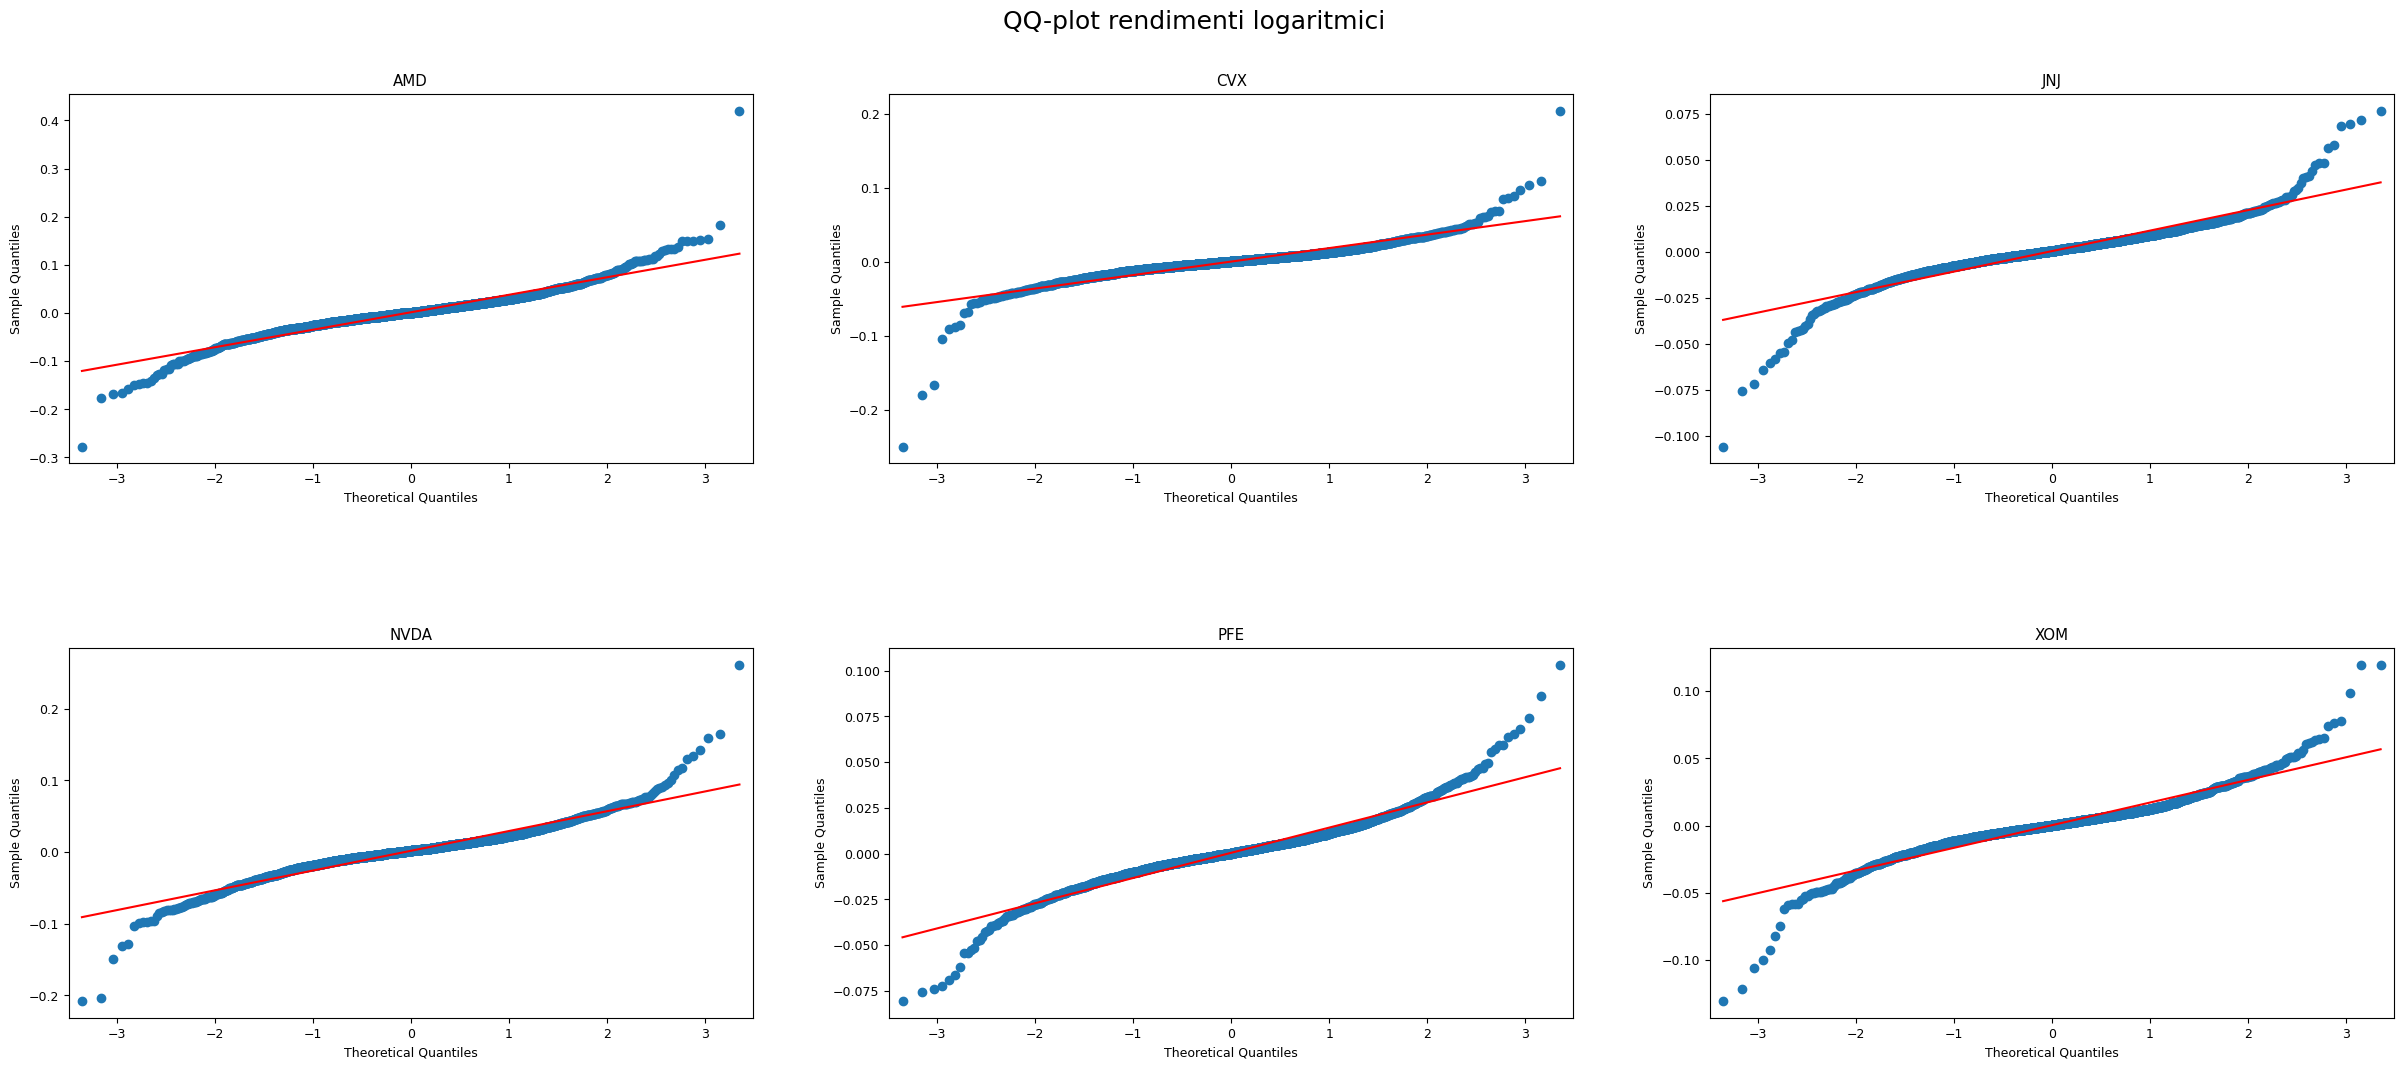

In [96]:
plt.figure(figsize=(30, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("QQ-plot rendimenti logaritmici", fontsize=18, y=0.95)

for n, ticker in enumerate(rendimento_logaritmico.columns):
    ax = plt.subplot(2, 3, n + 1)
    sm.qqplot(rendimento_logaritmico[ticker], line = 's', ax=ax)

    ax.set_title(ticker.upper())

### Statistiche descrittive univariate dei rendimenti logaritmici 

In [97]:
stats = pd.DataFrame()
stats['Media'] = rendimento_logaritmico.mean()
stats['Varianza'] = rendimento_logaritmico.var()
stats['Asimmetria'] = rendimento_logaritmico.skew()
stats['Curtosi'] =rendimento_logaritmico.kurtosis()
stats['Dev Std'] =rendimento_logaritmico.std()
stats


Media  Varianza  Asimmetria    Curtosi   Dev Std
AMD   0.001394  0.001320    0.423526  10.864245  0.036327
CVX   0.000378  0.000334   -1.002683  29.385222  0.018264
JNJ   0.000476  0.000124   -0.474642  10.249158  0.011146
NVDA  0.001604  0.000761    0.050368   8.547585  0.027578
PFE   0.000434  0.000190    0.167883   5.677459  0.013768
XOM   0.000258  0.000283   -0.172312   7.879786  0.016835

<AxesSubplot:>

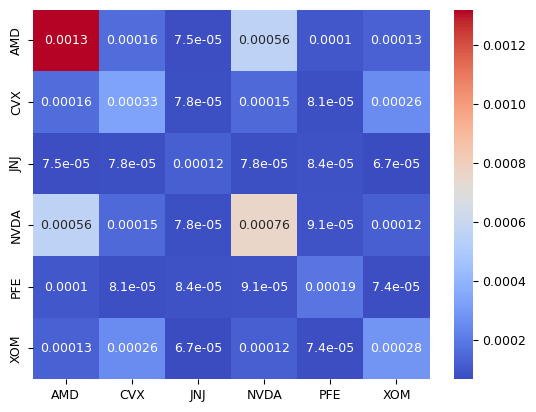

In [98]:
#Matrice delle varianze-covarianze
sns.heatmap(rendimento_logaritmico.cov(), annot=True, cmap='coolwarm')

<AxesSubplot:>

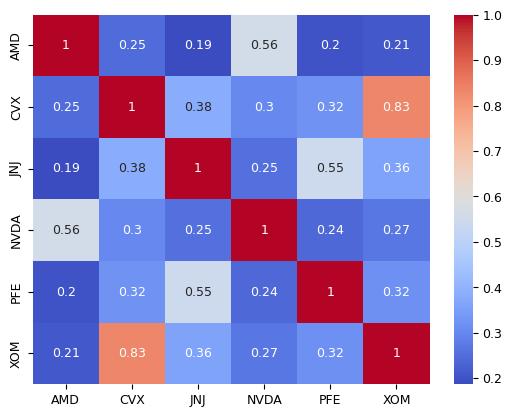

In [99]:
#Matrice di correlazione con seaborn
sns.heatmap(rendimento_logaritmico.corr(), annot = True, cmap = 'coolwarm')

In [100]:
rendimento_logaritmico= rendimento_logaritmico.dropna()

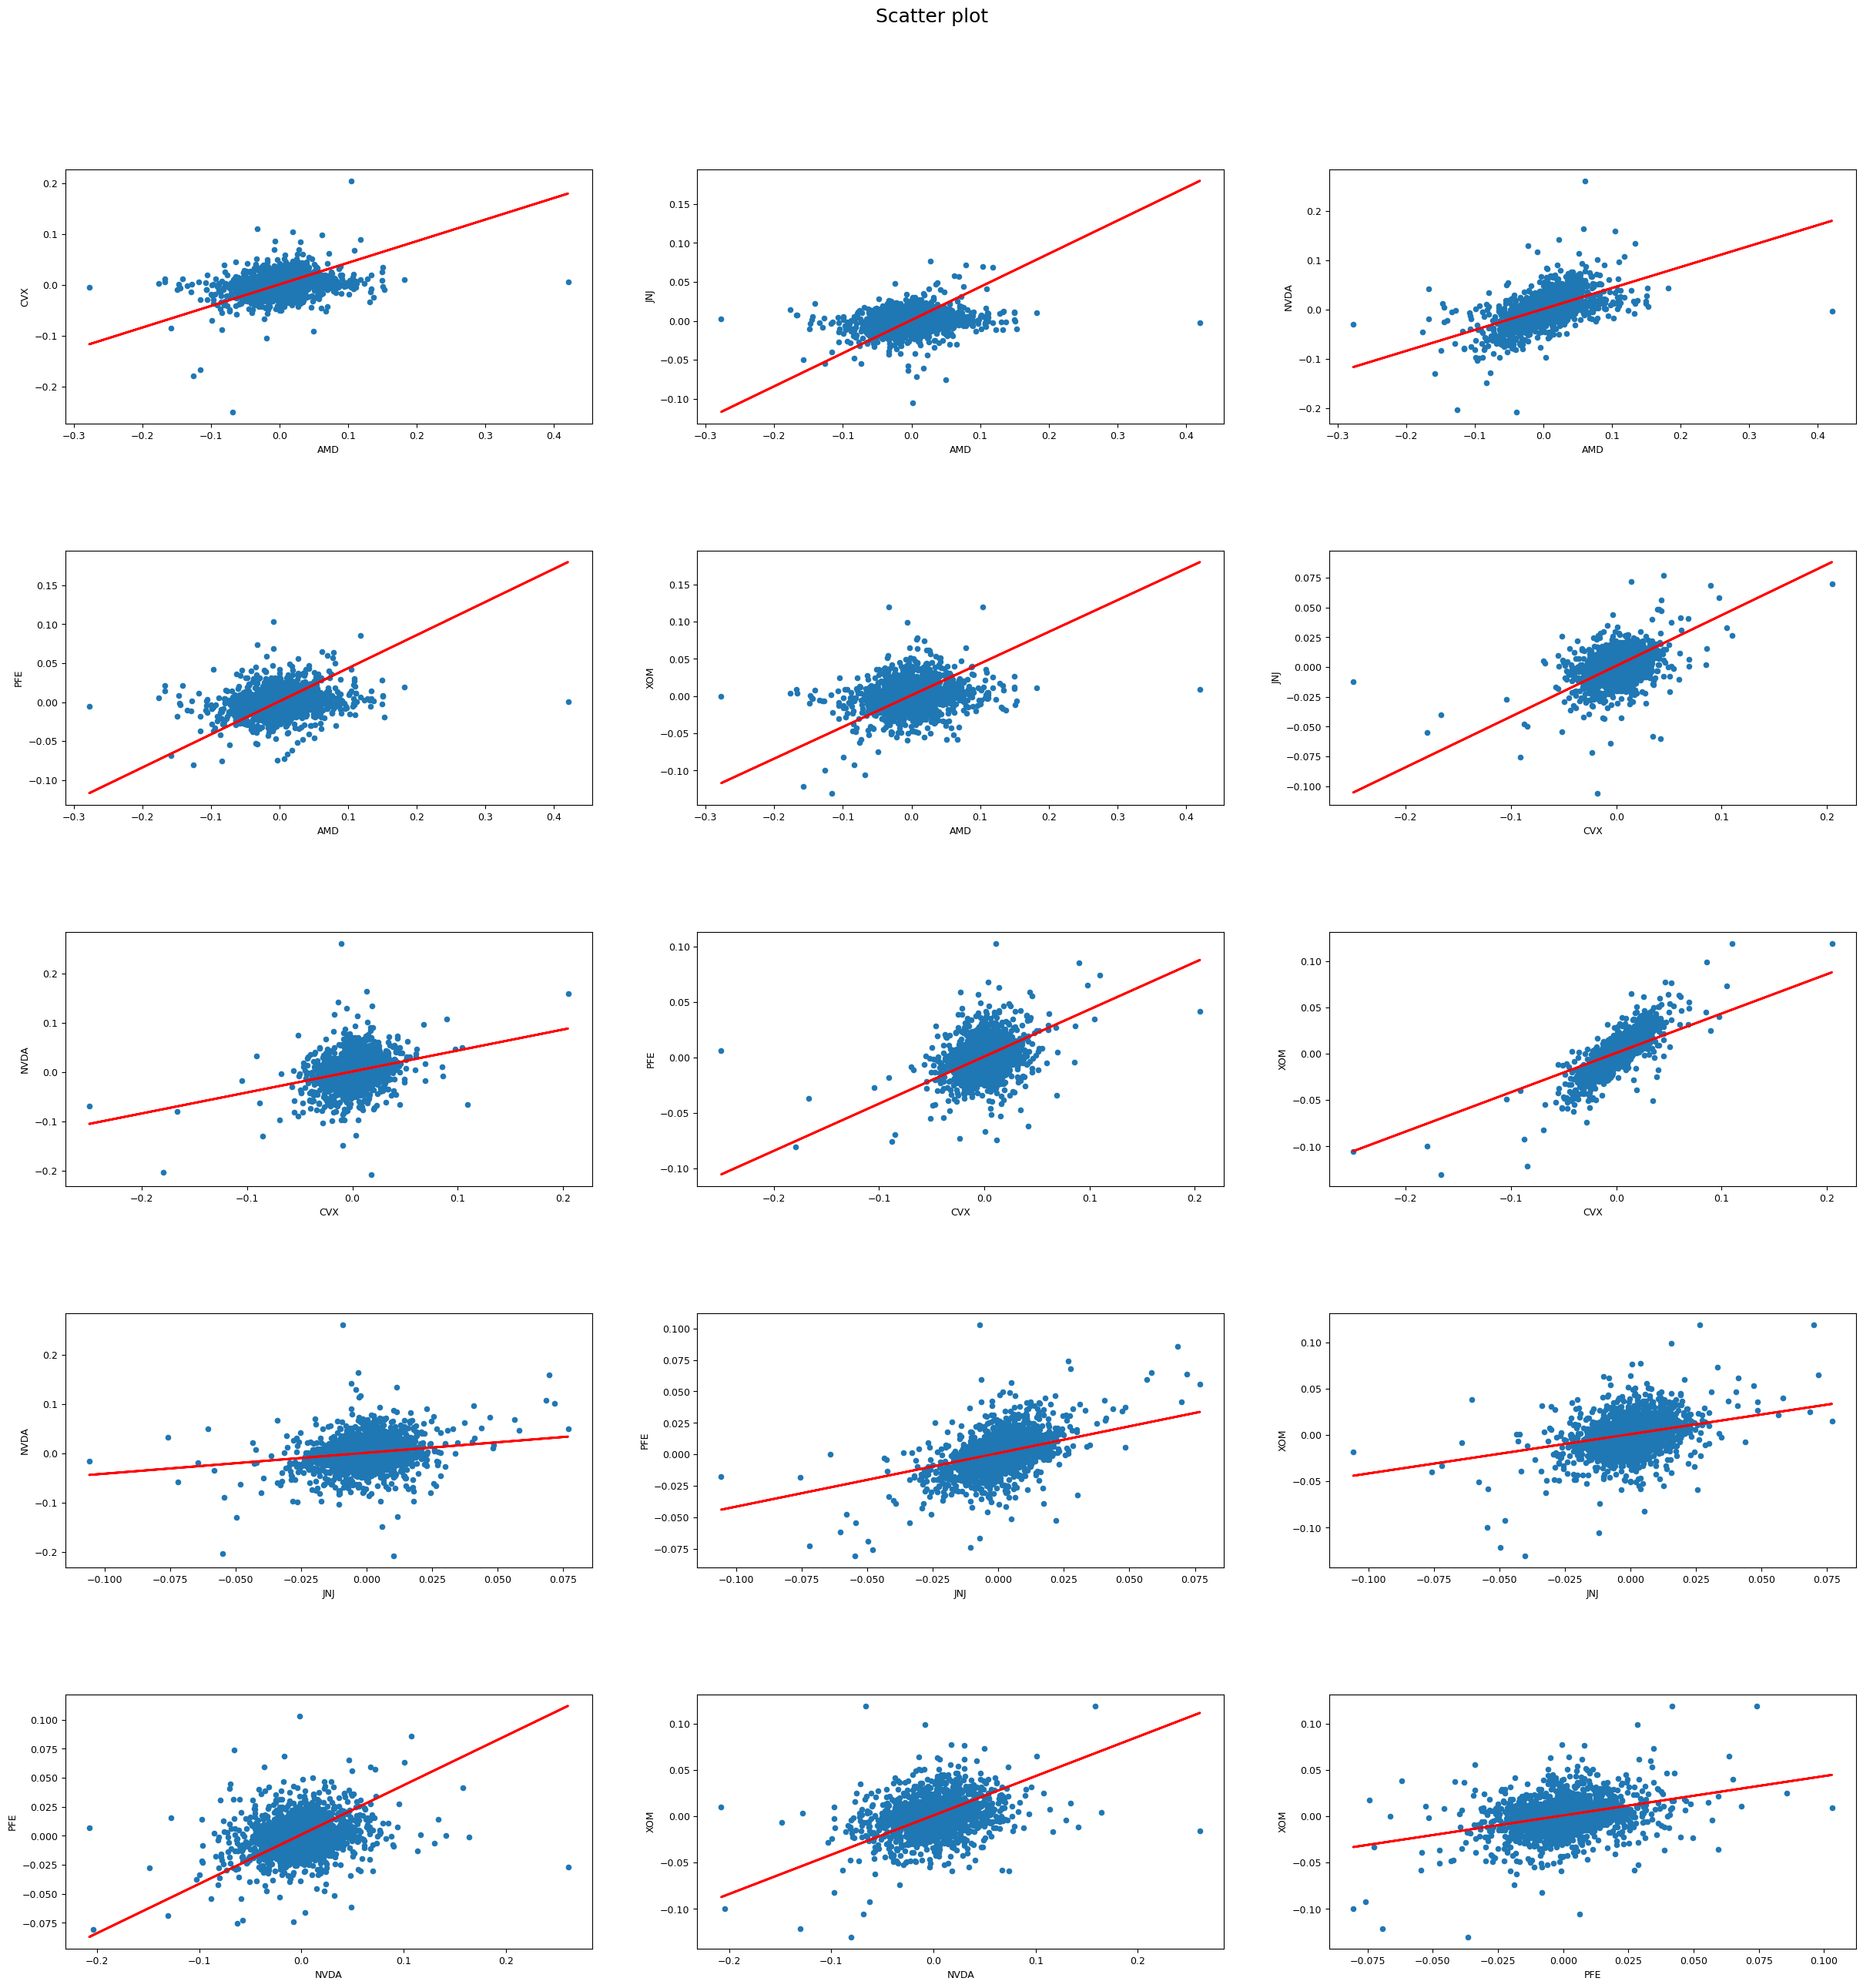

In [101]:
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Scatter plot", fontsize=18, y=0.95)

for i in range(0, len(rendimento_logaritmico.columns)) :
    symbol_1=rendimento_logaritmico.columns[i]
    if(i!=0):
        temp=temp+i
    else:
        temp=0
    for y in range(i, len(rendimento_logaritmico.columns)) :
        symbol_2= rendimento_logaritmico.columns[y]
        if symbol_1 != symbol_2 :
            num=i*5+y-temp
            ax = plt.subplot(5, 3, num)
            reg = np.polyfit(rendimento_logaritmico['AMD'], rendimento_logaritmico['NVDA'], deg=1)
            ax = rendimento_logaritmico.plot(kind = 'scatter', x = symbol_1, y= symbol_2, ax=ax)
            ax.plot(rendimento_logaritmico[symbol_1], np.polyval(reg, rendimento_logaritmico[symbol_1]), 'r', lw=2)


#reg = np.polyfit(rendimento_logaritmico['AMD'], rendimento_logaritmico['NVDA'], deg=1)

#ax = rendimento_logaritmico.plot(kind = 'scatter', x = 'AMD', y= 'NVDA', figsize=(19,8))
#ax.plot(rendimento_logaritmico['AMD'], np.polyval(reg, rendimento_logaritmico['AMD']), 'r', lw=2);

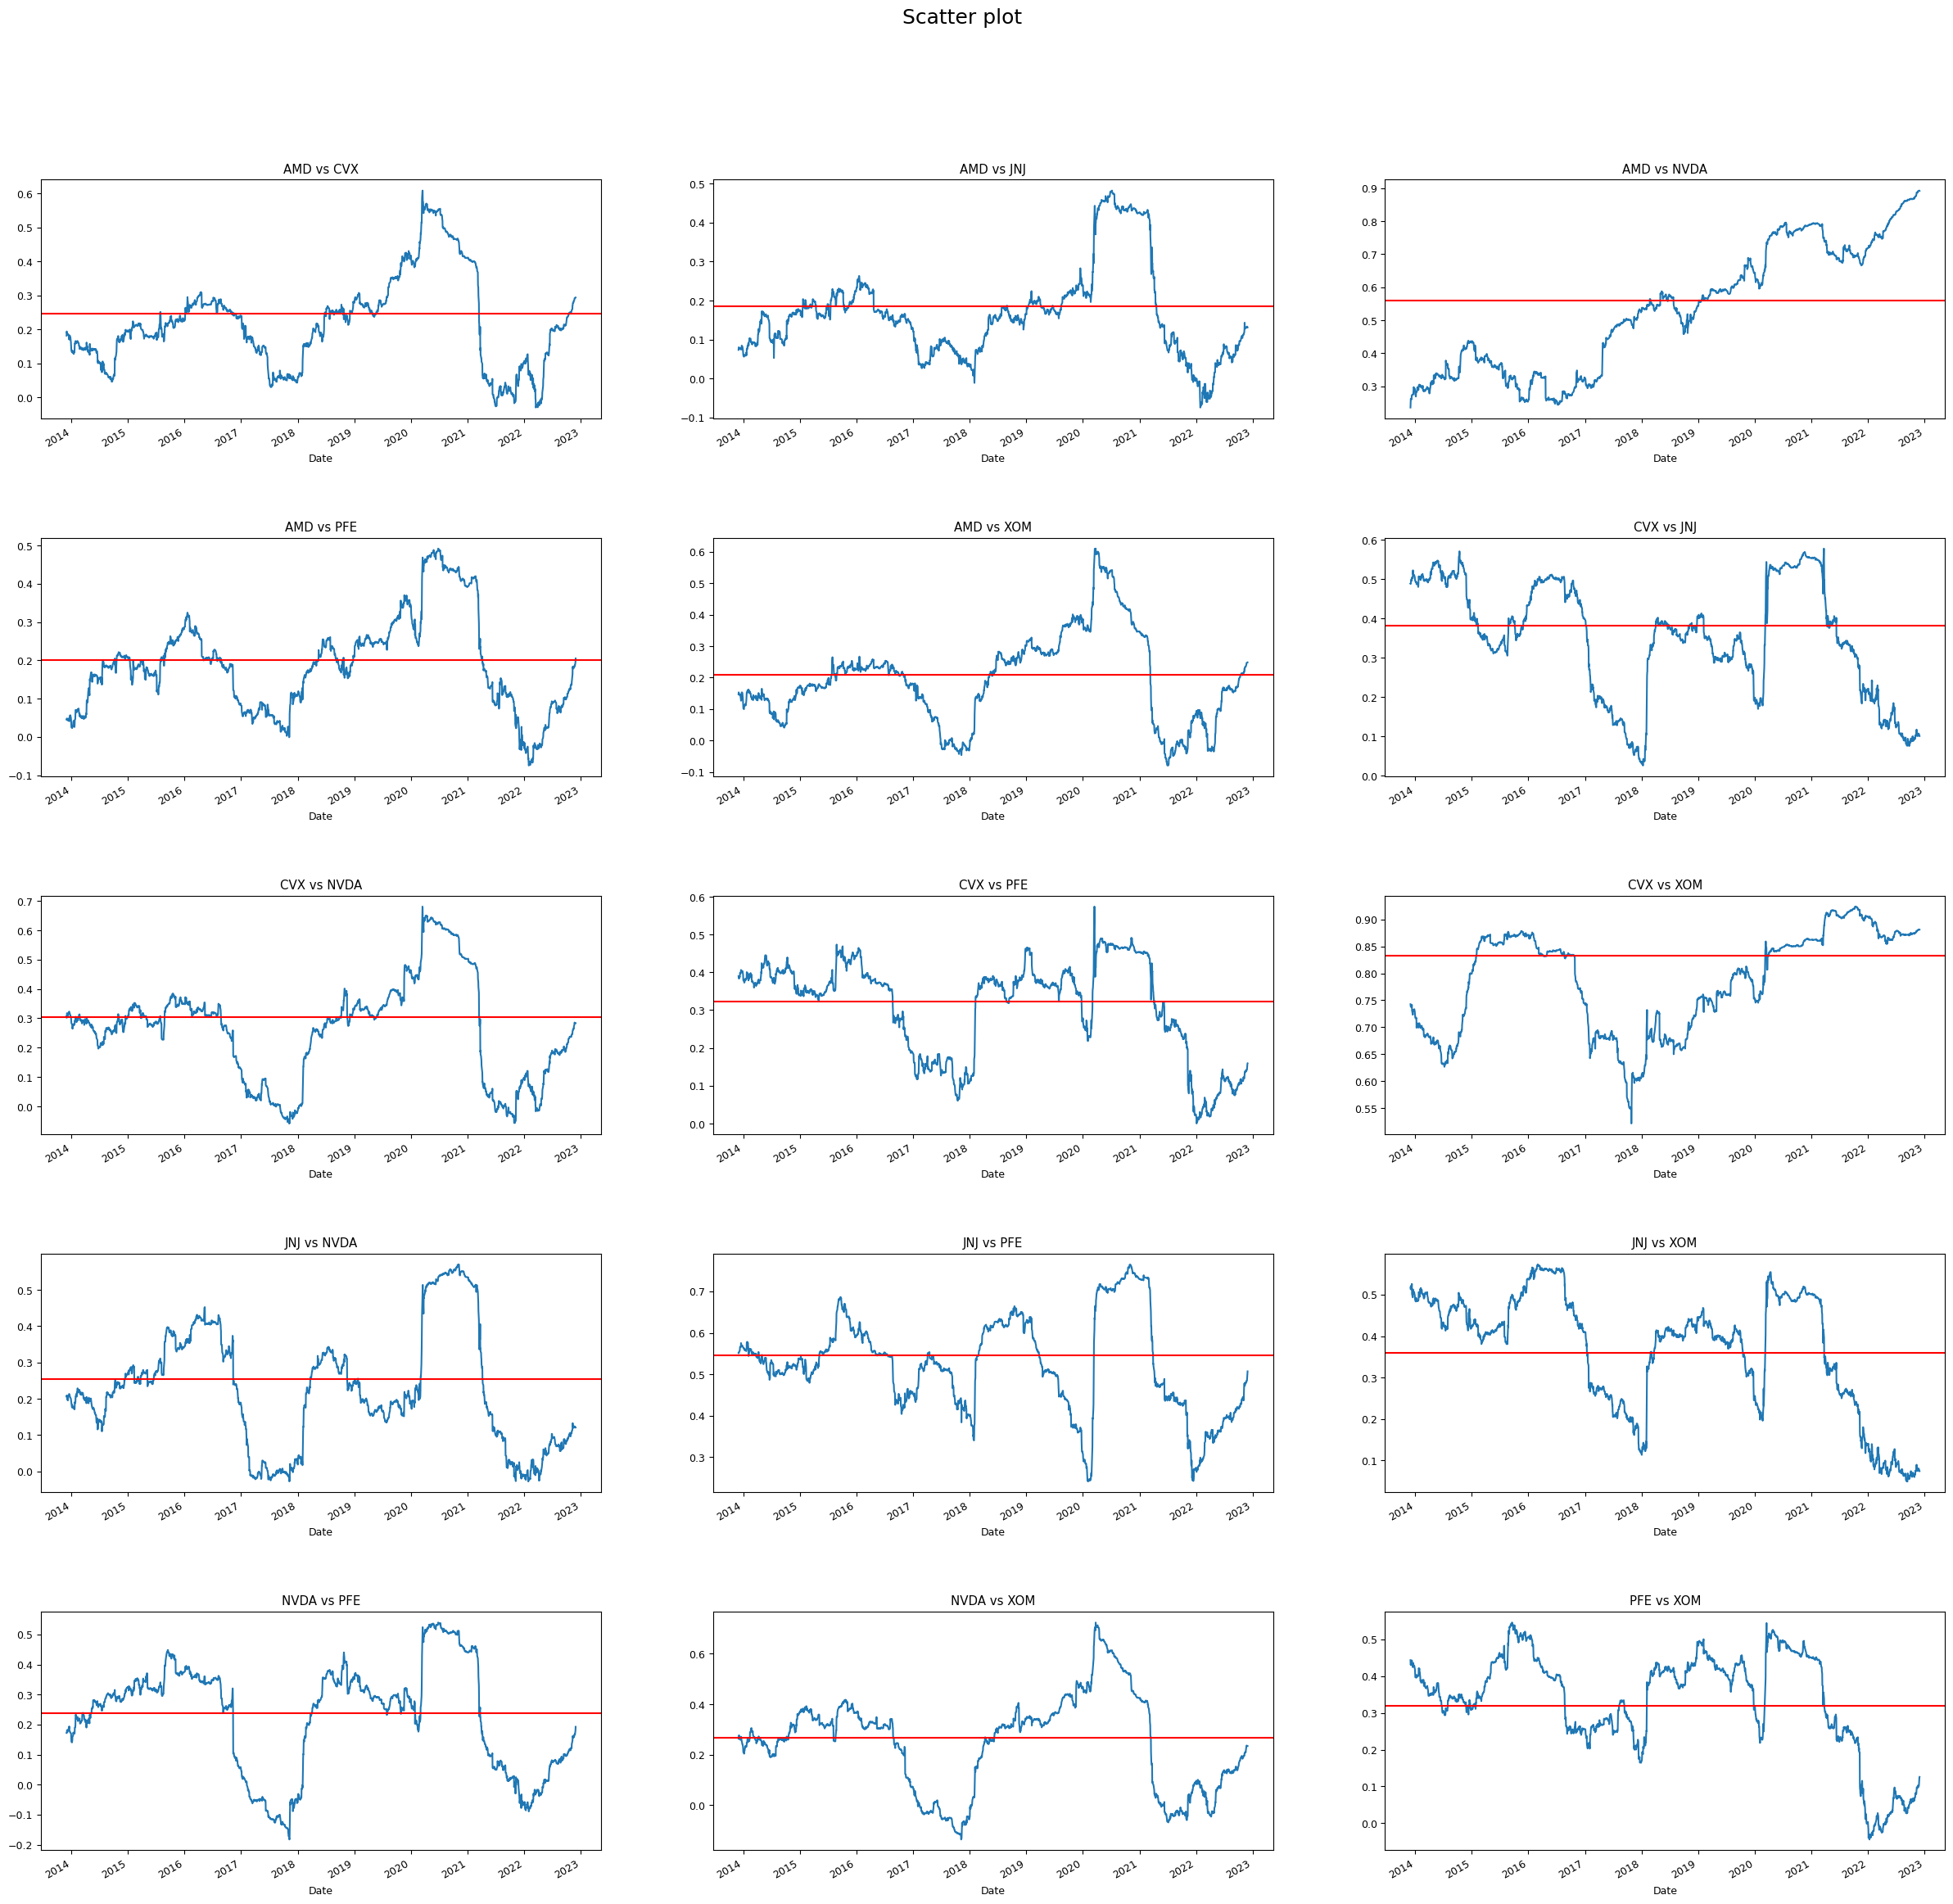

In [102]:


plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Scatter plot", fontsize=18, y=0.95)

for i in range(0, len(rendimento_logaritmico.columns)) :
    symbol_1=rendimento_logaritmico.columns[i]
    if(i!=0):
        temp=temp+i
    else:
        temp=0
    for y in range(i, len(rendimento_logaritmico.columns)) :
        symbol_2= rendimento_logaritmico.columns[y]
        if symbol_1 != symbol_2 :
            num=i*5+y-temp
            ax = plt.subplot(5, 3, num)
            ax = rendimento_logaritmico[symbol_1].rolling(window=252).corr(rendimento_logaritmico[symbol_2]).plot(figsize=(30,30), ax=ax, title=symbol_1 + ' vs ' + symbol_2)
            ax.axhline(rendimento_logaritmico.corr().iloc[i,y], c='r')

# 2.h?

### Strategie di trading e backtesting (MACD)

In [103]:
AMD_data= yf.download('AMD', start=start_date, end=end_date)
AMD_data = AMD_data.drop(columns = ['High', 'Low', 'Open', 'Close'])

AMD_data['SMA20'] = AMD_data['Adj Close'].rolling(20).mean()
AMD_data['SMA120'] = AMD_data['Adj Close'].rolling(120).mean()
AMD_data

[*********************100%***********************]  1 of 1 completed


Adj Close    Volume    SMA20     SMA120
Date                                               
2012-11-30   2.200000  66853900      NaN        NaN
2012-12-03   2.360000  70160800      NaN        NaN
2012-12-04   2.260000  52165300      NaN        NaN
2012-12-05   2.290000  20378800      NaN        NaN
2012-12-06   2.340000  22223500      NaN        NaN
...               ...       ...      ...        ...
2022-11-22  75.250000  55450200  66.3230  79.168500
2022-11-23  76.400002  81623600  67.1565  78.919333
2022-11-25  75.139999  26018900  67.9835  78.665083
2022-11-28  73.190002  45383800  68.5425  78.397667
2022-11-29  73.389999  51846400  69.2090  78.160083

[2517 rows x 4 columns]

Creo strategia di trading con MACD

In [104]:
AMD_data['Price_yesterday'] = AMD_data['Adj Close'].shift(1)
AMD_data['Change'] = AMD_data['Adj Close'] / AMD_data['Price_yesterday']
AMD_data['Invested_SMA'] = [1 if AMD_data.loc[i, 'SMA20'] > AMD_data.loc[i, 'SMA120'] 
                        else 0 for i in AMD_data.index]


sma = AMD_data[AMD_data['Invested_SMA'] == 1]
sma['Return'] = np.cumprod(sma['Change'])
sma['rtn'] =sma['Return'].pct_change()

print(sma['rtn'].std()*np.sqrt(252))

print(sma['rtn'].mean()*252 / (sma['rtn'].std()*np.sqrt(252)))

0.601921329880631
0.9826150202553676


C:\Users\stefa\AppData\Local\Temp\ipykernel_516\1162296323.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sma['Return'] = np.cumprod(sma['Change'])
C:\Users\stefa\AppData\Local\Temp\ipykernel_516\1162296323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sma['rtn'] =sma['Return'].pct_change()


Rendimento buy and hold 

In [105]:
AMD_data['Buy_and_hold'] = np.cumprod(AMD_data['Change'])
AMD_data['rtn'] = AMD_data['Buy_and_hold'].pct_change()

print(AMD_data['rtn'].std()) # Volatility
print(AMD_data['rtn'].mean()*252 / (AMD_data['rtn'].std()*np.sqrt(252))) # Sharpe Ratio

0.03684099211696575
0.8754924594675738


Medie mobili esponenziali

In [106]:
AMD_data['EWM12'] = AMD_data['Adj Close'].ewm(span=12, adjust=False).mean()
AMD_data['EWM26'] = AMD_data['Adj Close'].ewm(span=26, adjust=False).mean()
AMD_data['Invested_EWM'] = [1 if AMD_data.loc[i, 'EWM12'] > AMD_data.loc[i, 'EWM26'] 
                        else 0 for i in AMD_data.index]
ewm = AMD_data[AMD_data['Invested_EWM'] == 1]
ewm['Return'] = np.cumprod(ewm['Change'])

#Volatility 
print(ewm['Return'].std())

#Sharpe Ratio
print(ewm['Return'].mean()*252 / (ewm['Return'].std()*np.sqrt(252)))

33.864111968202316
13.310418182255113


C:\Users\stefa\AppData\Local\Temp\ipykernel_516\310731138.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ewm['Return'] = np.cumprod(ewm['Change'])


Google trend "amd stock" globale

In [107]:
AMD_stock_trend= pd.read_csv('amd-stock.csv', index_col = 'date', parse_dates = True)


Confronto delle strategie

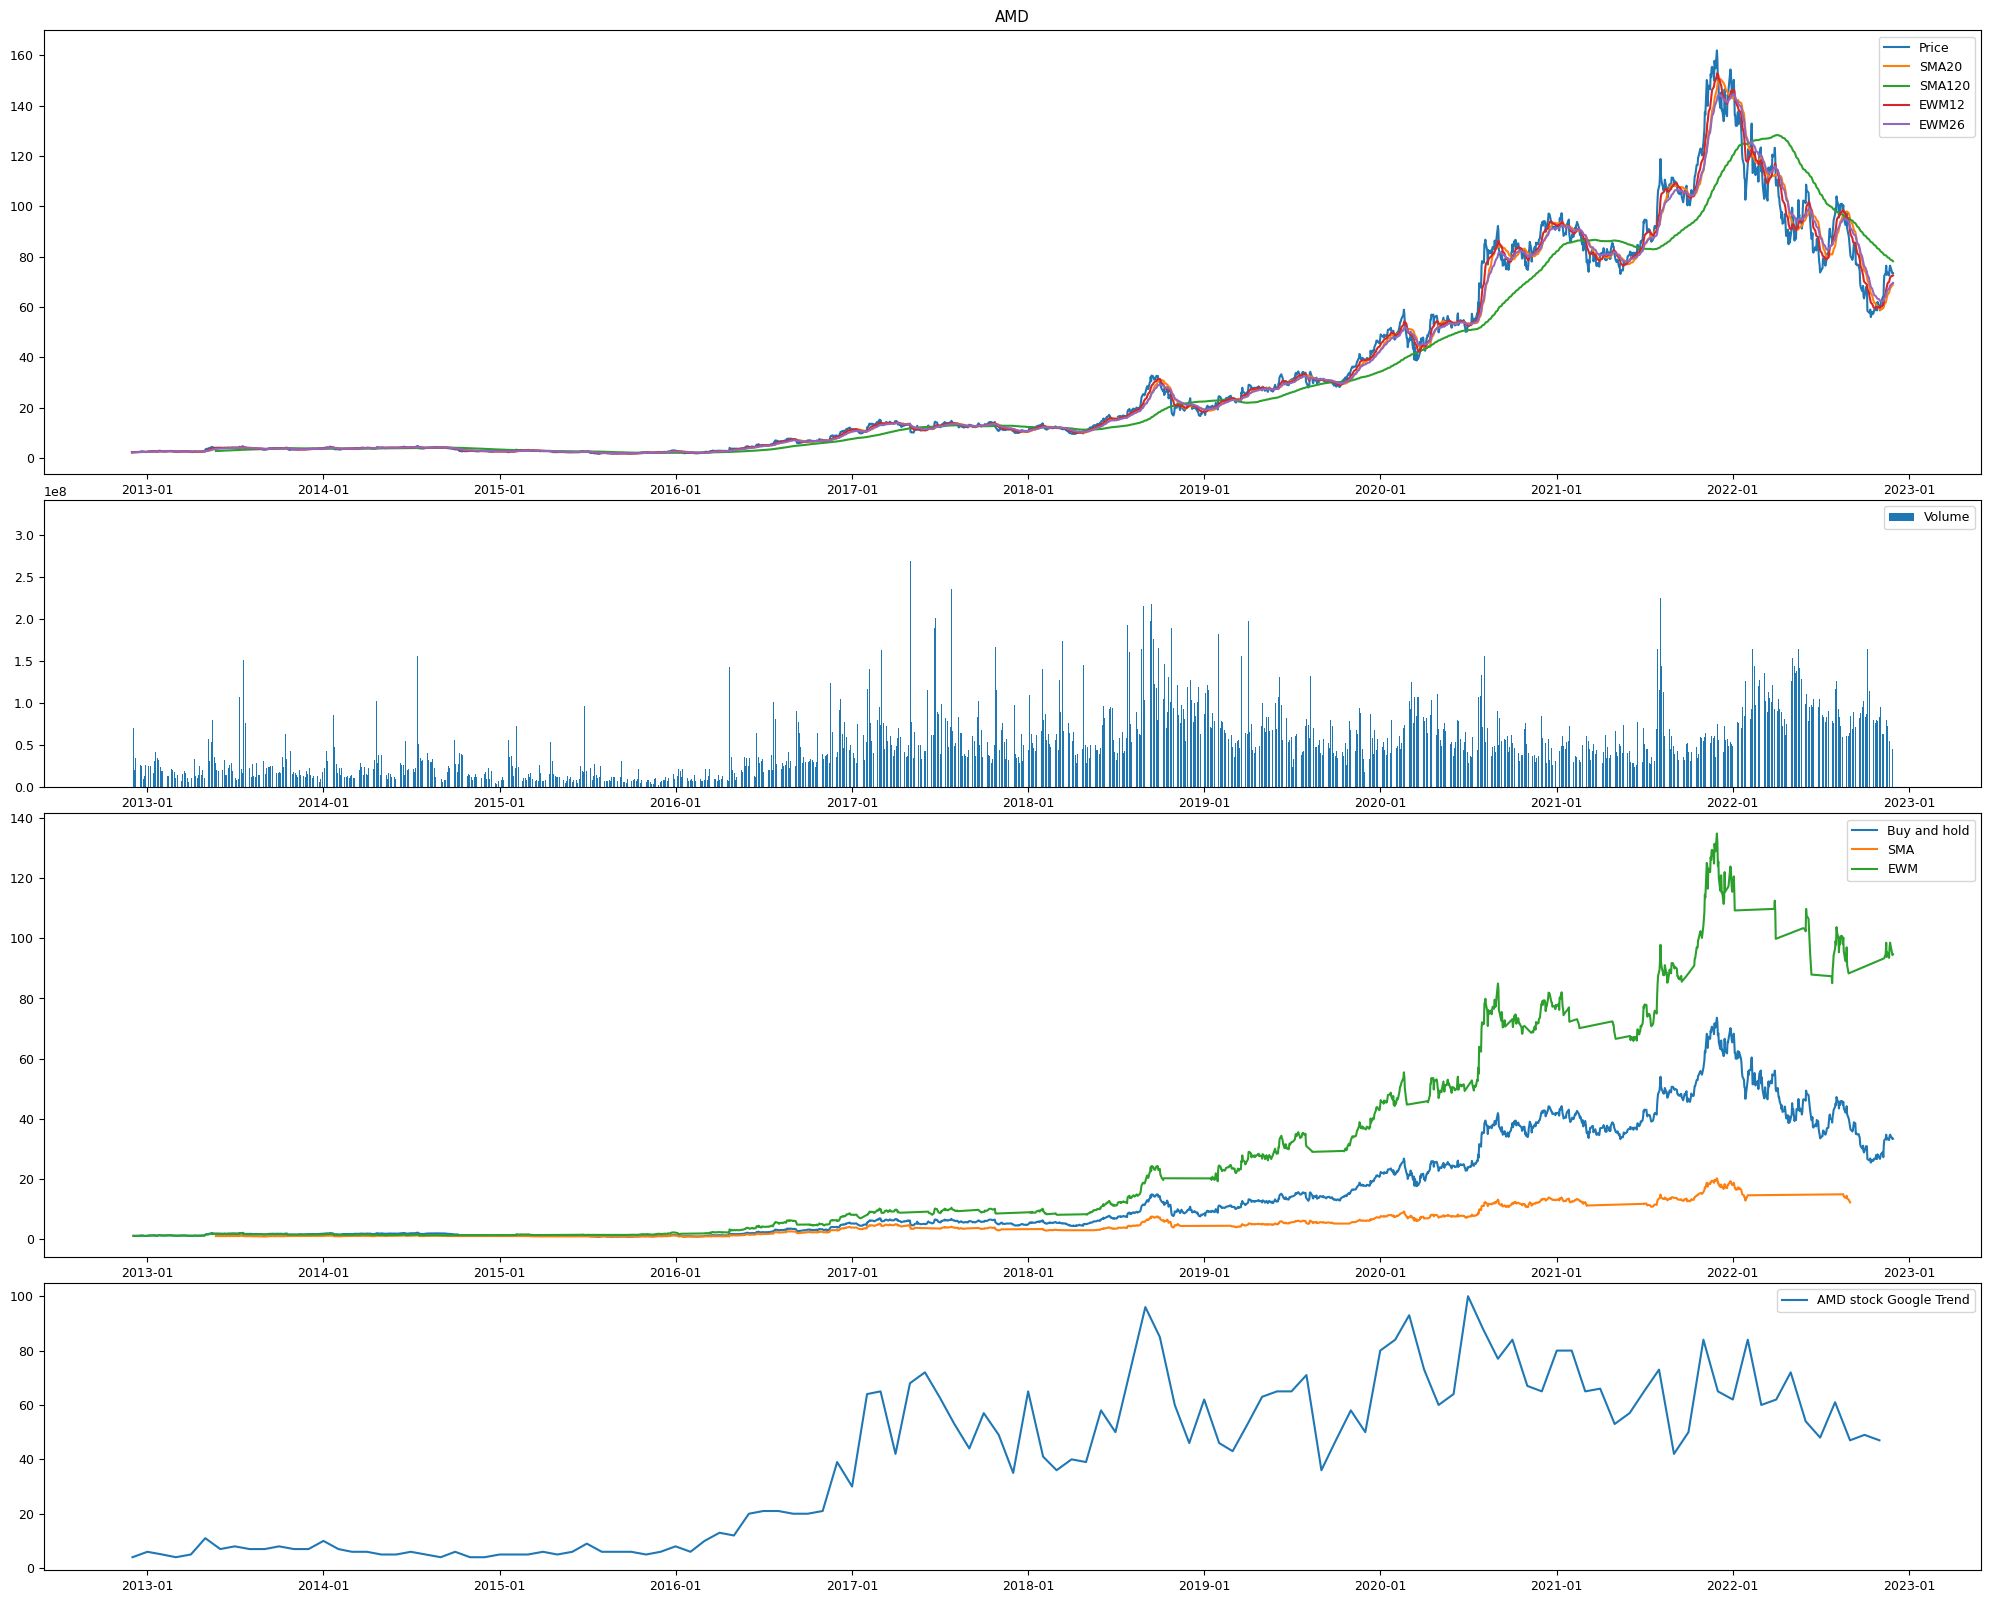

In [108]:
plt.figure(figsize=(25,20))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 3, colspan = 1, title = "AMD")
ax2 = plt.subplot2grid((10,1), (3,0), rowspan = 2, colspan = 1, sharex = ax1)
ax3 = plt.subplot2grid((10,1), (5,0), rowspan = 3, colspan = 1, sharex = ax1)
ax4 = plt.subplot2grid((10,1), (8,0), rowspan = 2, colspan = 1, sharex = ax1)

ax1.plot(AMD_data['Adj Close'], label = 'Price')
ax1.plot(AMD_data['SMA20'], label = 'SMA20')
ax1.plot(AMD_data['SMA120'], label = 'SMA120')
ax1.plot(AMD_data['EWM12'], label = 'EWM12')
ax1.plot(AMD_data['EWM26'], label = 'EWM26')

ax2.bar(AMD_data.index, AMD_data['Volume'], label = 'Volume')
ax3.plot(AMD_data['Buy_and_hold'], label = 'Buy and hold')
ax3.plot(sma['Return'], label = 'SMA')
ax3.plot(ewm['Return'], label ='EWM')
ax4.plot(AMD_stock_trend, label ='AMD stock Google Trend')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax3.set_xlabel('Date (Year - month)')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.show()

### CAPM

In [109]:
rendimento_semplice_mensile= dataframe.resample("M").last().pct_change().dropna();
#rendimento_logaritmico_mensile= np.log(dataframe.resample("M").last()/dataframe.resample("M").last().shift())

market_benchmark_SP500= yf.download('^GSPC', start = start_date, end = end_date)
market_benchmark_SP500=market_benchmark_SP500["Adj Close"];
market_benchmark= market_benchmark_SP500.rename("^GSPC").resample("M").last();
market_benchmark= market_benchmark.pct_change().dropna();

rendimento_benchmark= rendimento_semplice_mensile.join(market_benchmark).dropna()
rendimento_benchmark


[*********************100%***********************]  1 of 1 completed


AMD       CVX       JNJ      NVDA       PFE       XOM  \
Date                                                                     
2012-12-31  0.090909  0.023181  0.005306  0.024227  0.002398 -0.018040   
2013-01-31  0.083333  0.064823  0.054494  0.000000  0.097226  0.039515   
2013-02-28 -0.042308  0.025289  0.037862  0.038962  0.003299  0.001690   
2013-03-31  0.024096  0.014255  0.071212  0.013428  0.054439  0.006254   
2013-04-30  0.105882  0.026847  0.045382  0.073266  0.007276 -0.012429   
...              ...       ...       ...       ...       ...       ...   
2022-07-31  0.235386  0.131234 -0.016844  0.198166 -0.029145  0.131831   
2022-08-31 -0.101620 -0.026156 -0.069310 -0.168970 -0.104534 -0.004242   
2022-09-30 -0.253446 -0.091041  0.012520 -0.195534 -0.032501 -0.086620   
2022-10-31 -0.052083  0.259135  0.064949  0.111871  0.063757  0.269156   
2022-11-30  0.221945  0.008460  0.018719  0.158702  0.072270  0.005594   

               ^GSPC  
Date                  
2012-12-31  0.007068  
2013-01-31  0.050428  
2013-02-28  0.011061  
2013-03-31  0.035988  
2013-04-30  0.018086  
...              ...  
2022-07-31  0.091116  
2022-08-31 -0.042440  
2022-09-30 -0.093396  
2022-10-31  0.079863  
2022-11-30  0.022120  

[120 rows x 7 columns]

In [110]:
#Covarianza
covarianza = rendimento_benchmark.cov()
print(covarianza)
varianza = rendimento_benchmark["^GSPC"].var()

beta = covarianza.loc["^GSPC"] / varianza
beta

            AMD       CVX       JNJ      NVDA       PFE       XOM     ^GSPC
AMD    0.026048  0.003925  0.001579  0.009877  0.004173  0.002388  0.003635
CVX    0.003925  0.006000  0.001363  0.002314  0.001454  0.005177  0.002126
JNJ    0.001579  0.001363  0.001951  0.000787  0.001498  0.001334  0.001098
NVDA   0.009877  0.002314  0.000787  0.014387  0.001712  0.001857  0.002827
PFE    0.004173  0.001454  0.001498  0.001712  0.003863  0.000853  0.001336
XOM    0.002388  0.005177  0.001334  0.001857  0.000853  0.005909  0.001891
^GSPC  0.003635  0.002126  0.001098  0.002827  0.001336  0.001891  0.001760


AMD      2.064928
CVX      1.207501
JNJ      0.623813
NVDA     1.606127
PFE      0.758996
XOM      1.074263
^GSPC    1.000000
Name: ^GSPC, dtype: float64

### Modello di Fama-French 3 fattori

In [111]:
factor_df = pd.read_csv('F-F_Research_Data_Factors.csv', skiprows=3)
factor_df.head()

Unnamed: 0    Mkt-RF       SMB       HML        RF
0     192607      2.96     -2.56     -2.43      0.22
1     192608      2.64     -1.17      3.82      0.25
2     192609      0.36     -1.40      0.13      0.23
3     192610     -3.24     -0.09      0.70      0.32
4     192611      2.53     -0.10     -0.51      0.31

Eliminiamo i dati annuali in fondo al file

In [112]:
stringa = ' Annual Factors: January-December '
indices = factor_df.iloc[:,0] == stringa
start_of_annual = factor_df[indices].index[0]
factor_df = factor_df[factor_df.index < start_of_annual]

factor_df.columns = ['data', 'mkt', 'smb', 'hml', 'rf']
factor_df['data'] = pd.to_datetime(factor_df['data'], format='%Y%m').dt.strftime("%Y-%m")
factor_df.head()

data       mkt       smb       hml        rf
0  1926-07      2.96     -2.56     -2.43      0.22
1  1926-08      2.64     -1.17      3.82      0.25
2  1926-09      0.36     -1.40      0.13      0.23
3  1926-10     -3.24     -0.09      0.70      0.32
4  1926-11      2.53     -0.10     -0.51      0.31

In [113]:
factor_df = factor_df.set_index('data')
factor_df = factor_df[start_date:end_date]
factor_df = factor_df.apply(pd.to_numeric, errors='coerce').div(100)
factor_df

mkt     smb     hml      rf
data                                   
2012-12  0.0118  0.0150  0.0351  0.0001
2013-01  0.0557  0.0033  0.0096  0.0000
2013-02  0.0129 -0.0028  0.0011  0.0000
2013-03  0.0403  0.0081 -0.0019  0.0000
2013-04  0.0155 -0.0236  0.0045  0.0000
...         ...     ...     ...     ...
2022-07  0.0957  0.0281 -0.0410  0.0008
2022-08 -0.0377  0.0139  0.0031  0.0019
2022-09 -0.0935 -0.0082  0.0003  0.0019
2022-10  0.0783  0.0010  0.0805  0.0023
2022-11  0.0460 -0.0340  0.0139  0.0029

[120 rows x 4 columns]

In [114]:
rendimento_semplice_mensile.index = rendimento_semplice_mensile.index.strftime('%Y-%m')
rendimento_semplice_mensile.head()

AMD       CVX       JNJ      NVDA       PFE       XOM
Date                                                               
2012-12  0.090909  0.023181  0.005306  0.024227  0.002398 -0.018040
2013-01  0.083333  0.064823  0.054494  0.000000  0.097226  0.039515
2013-02 -0.042308  0.025289  0.037862  0.038962  0.003299  0.001690
2013-03  0.024096  0.014255  0.071212  0.013428  0.054439  0.006254
2013-04  0.105882  0.026847  0.045382  0.073266  0.007276 -0.012429

In [115]:
ff_data = factor_df.join(rendimento_semplice_mensile.add_prefix("rtn_")).dropna()

mylist=["rtn_NVDA", "rtn_PFE", "rtn_JNJ", "rtn_XOM", "rtn_PYPL", "rtn_CVX"]

eccessi= pd.DataFrame({"excess_"+symbol: ff_data[symbol] - ff_data.rf
               for symbol in ff_data 
               if symbol in mylist})
               
#ff_data['excess_rtn'] = ff_data.JNJ - ff_data.rf
eccessi= ff_data.join(eccessi)

eccessi.head()

mkt     smb     hml      rf   rtn_AMD   rtn_CVX   rtn_JNJ  \
data                                                                    
2012-12  0.0118  0.0150  0.0351  0.0001  0.090909  0.023181  0.005306   
2013-01  0.0557  0.0033  0.0096  0.0000  0.083333  0.064823  0.054494   
2013-02  0.0129 -0.0028  0.0011  0.0000 -0.042308  0.025289  0.037862   
2013-03  0.0403  0.0081 -0.0019  0.0000  0.024096  0.014255  0.071212   
2013-04  0.0155 -0.0236  0.0045  0.0000  0.105882  0.026847  0.045382   

         rtn_NVDA   rtn_PFE   rtn_XOM  excess_rtn_CVX  excess_rtn_JNJ  \
data                                                                    
2012-12  0.024227  0.002398 -0.018040        0.023081        0.005206   
2013-01  0.000000  0.097226  0.039515        0.064823        0.054494   
2013-02  0.038962  0.003299  0.001690        0.025289        0.037862   
2013-03  0.013428  0.054439  0.006254        0.014255        0.071212   
2013-04  0.073266  0.007276 -0.012429        0.026847        0.045382   

         excess_rtn_NVDA  excess_rtn_PFE  excess_rtn_XOM  
data                                                      
2012-12         0.024127        0.002298       -0.018140  
2013-01         0.000000        0.097226        0.039515  
2013-02         0.038962        0.003299        0.001690  
2013-03         0.013428        0.054439        0.006254  
2013-04         0.073266        0.007276       -0.012429

In [116]:
symbol_list=["excess_rtn_NVDA", "excess_rtn_PFE", "excess_rtn_JNJ", "excess_rtn_XOM", "excess_rtn_PYPL", "excess_rtn_CVX"]
ff_model= [smf.ols(formula = symbol+' ~ mkt + smb + hml', data = eccessi).fit() for symbol in eccessi if symbol in symbol_list]

print(ff_model[1].summary())

                            OLS Regression Results                            
Dep. Variable:         excess_rtn_JNJ   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     22.76
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           1.17e-11
Time:                        22:10:42   Log-Likelihood:                 232.17
No. Observations:                 120   AIC:                            -456.3
Df Residuals:                     116   BIC:                            -445.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0036      0.003      1.060      0.2

In [117]:
rf= ff_data.rf.mean()
mkt= ff_data.mkt.mean()
rend_attesi = rf+ beta * (mkt - rf) *12
rend_attesi

AMD      0.252650
CVX      0.147967
JNJ      0.076705
NVDA     0.196635
PFE      0.093209
XOM      0.131700
^GSPC    0.122633
Name: ^GSPC, dtype: float64

### ARIMA FORECASTING

In [118]:
df_settle=dataframe["NVDA"].resample("M").last()

train_data = df_settle.iloc[0:80]
validation_data = df_settle.iloc[79:110]
test_data = df_settle.iloc[109:120]

<Figure size 640x480 with 0 Axes>

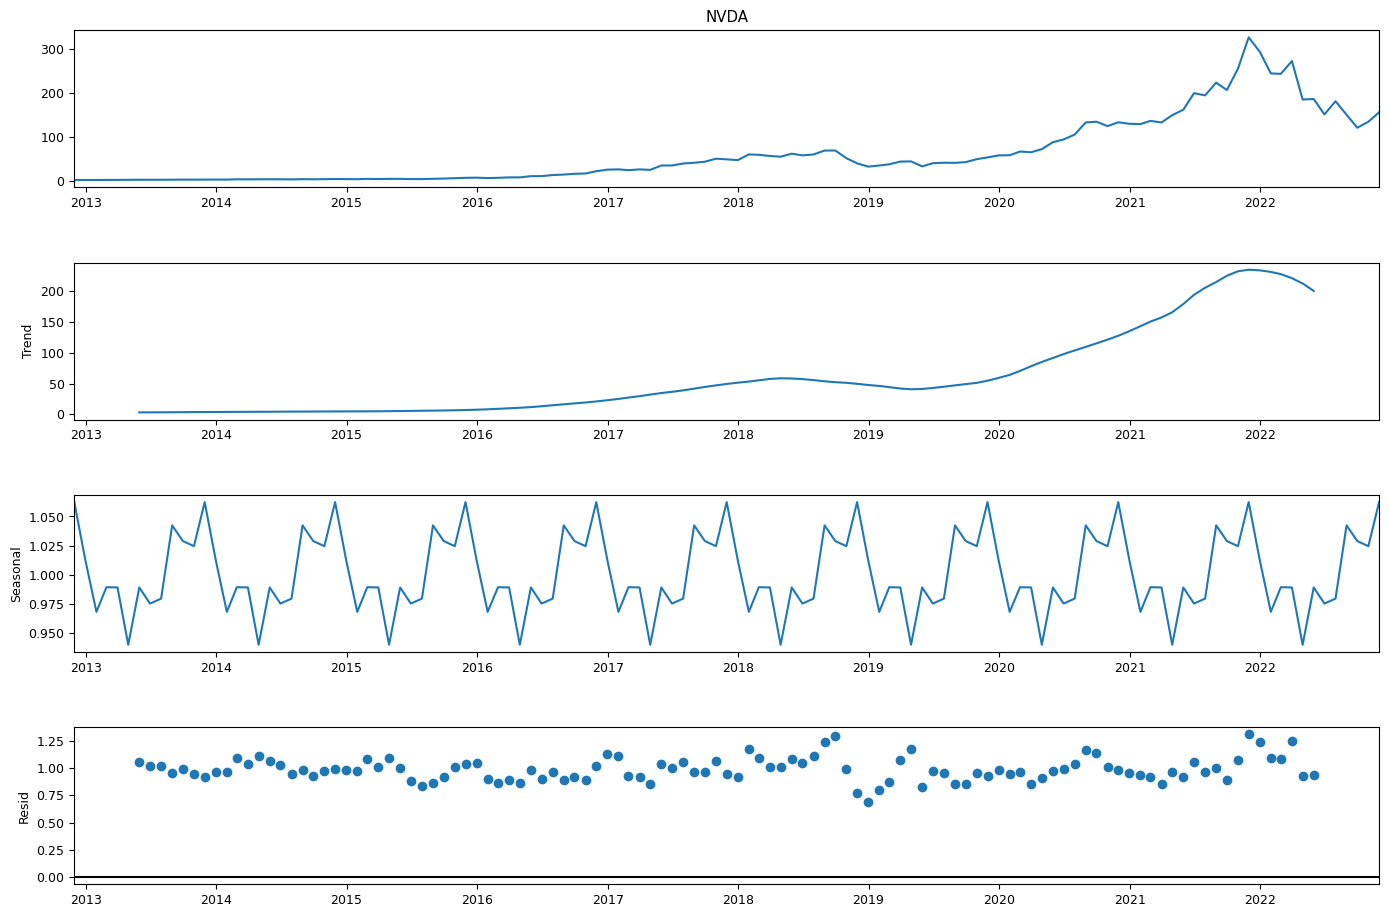

In [119]:
result = seasonal_decompose(df_settle, 
                            model='multiplicative')
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

Cerchiamo il valore di p (quinta linea)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

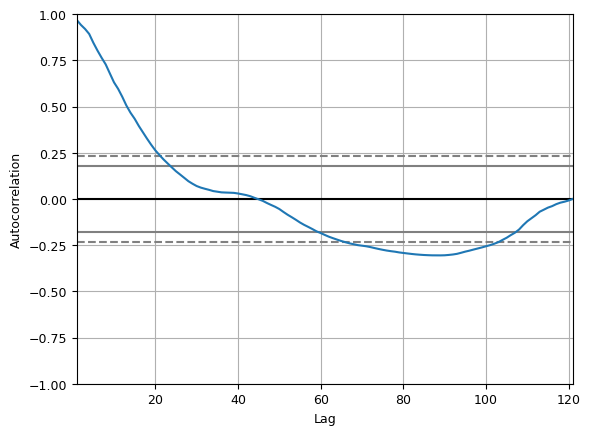

In [120]:
pd.plotting.autocorrelation_plot(df_settle)

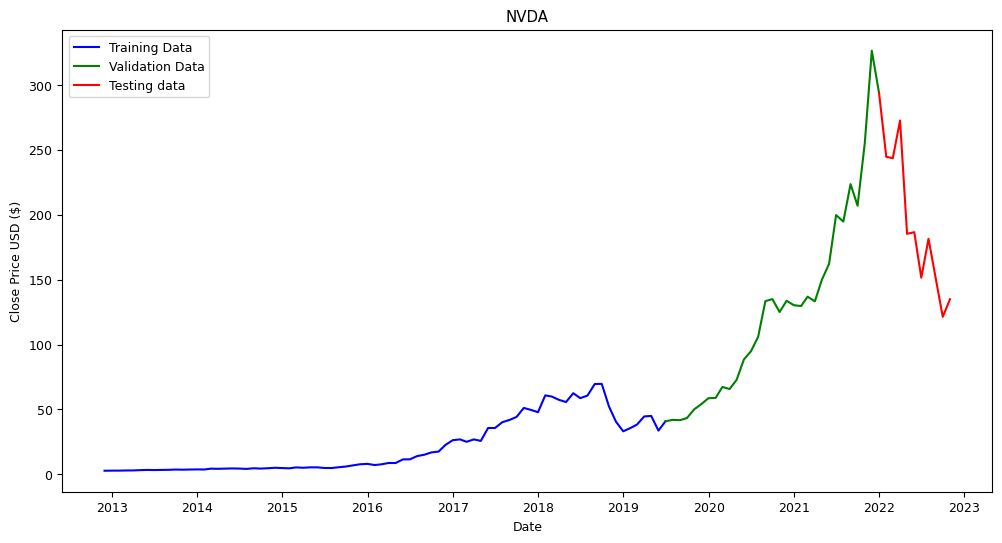

In [121]:
plt.figure(figsize=(12,6))
plt.title('NVDA')
plt.plot(
    train_data, 'blue', label='Training Data')
plt.plot(validation_data, 'green', label='Validation Data')
plt.plot(test_data, 'red', label='Testing data')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()

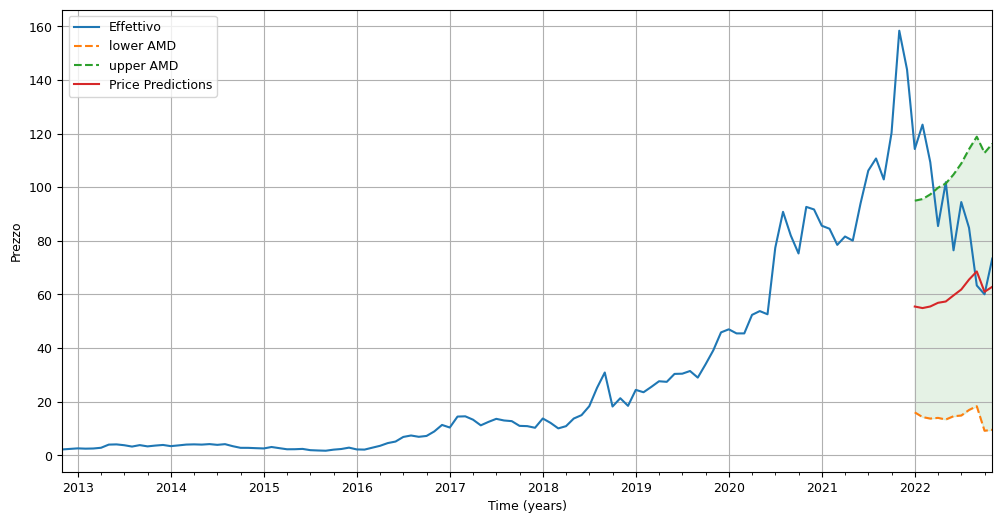

c:\Users\stefa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\stefa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


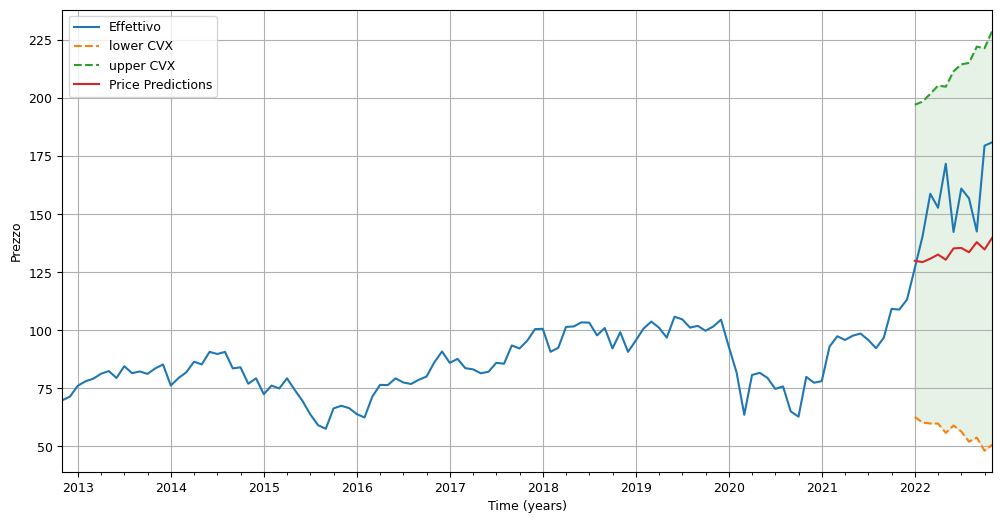

c:\Users\stefa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\stefa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\stefa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


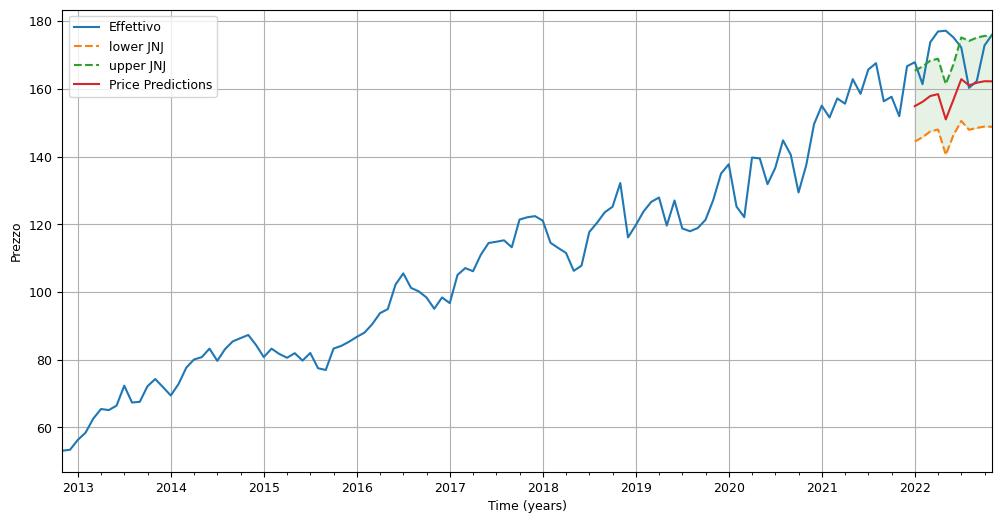

c:\Users\stefa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\stefa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\stefa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


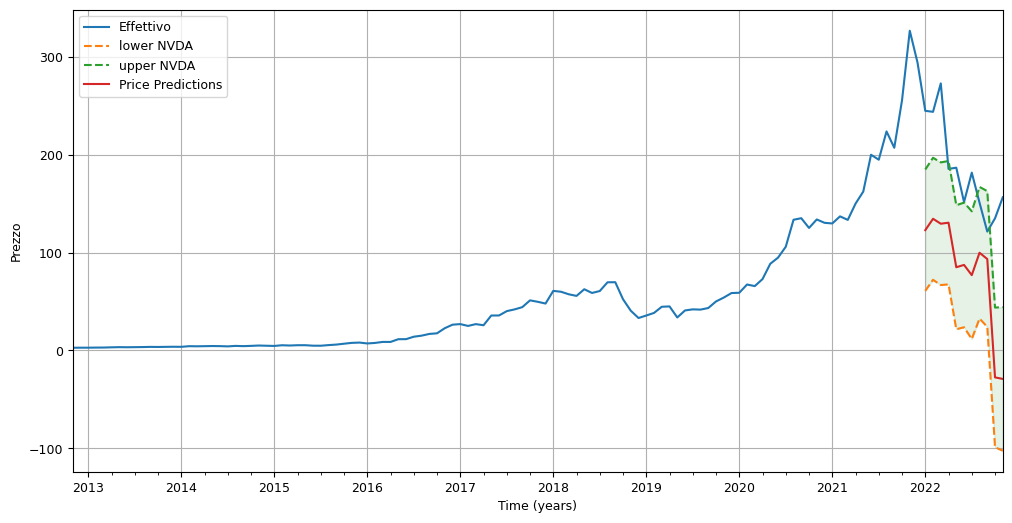

c:\Users\stefa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


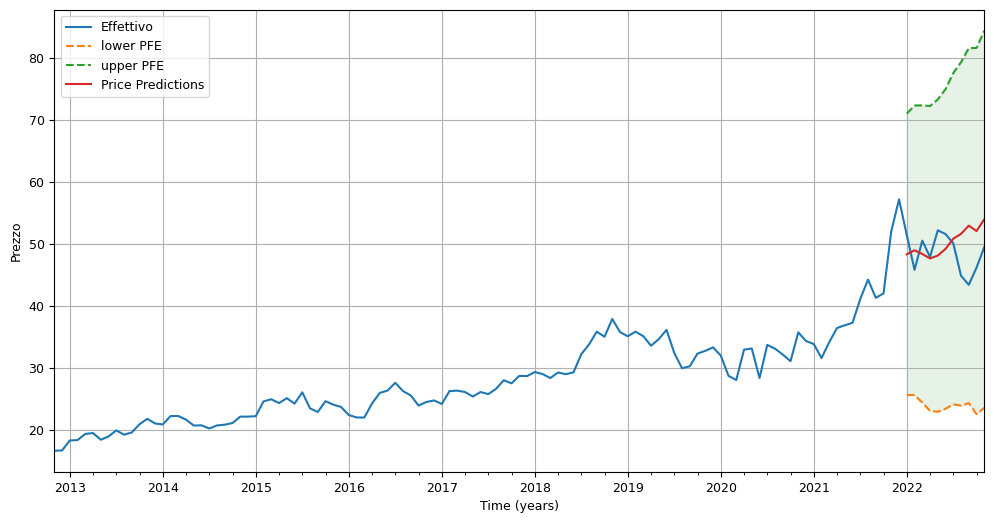

c:\Users\stefa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


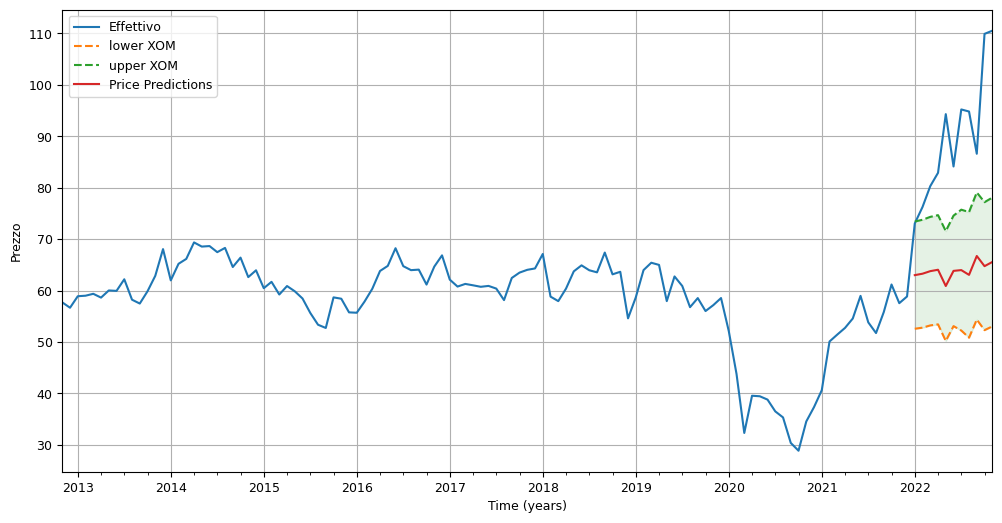

In [122]:
def arima_grid_search(dataframe, s):
    p = [0, 1, 2]
    d = q = range(0,2)
    param_combinations = list(itertools.product(p, d, q))
    lowest_aic, pdq, pdqs = None, None, None
    total_iterations = 0
    for order in param_combinations:
        for (p, q, d) in param_combinations:
            seasonal_order = (p, q, d, s)
            total_iterations += 1
            try:
                model = SARIMAX(dataframe, order = order,
                               seasonal_order= seasonal_order,
                               enforce_stationarity=False,
                               enforce_invertibility=False,
                               disp = False
                               )
                model_result = model.fit(maxiter=200, disp=False)
                
                if not lowest_aic or model_result.aic < lowest_aic:
                    lowest_aic = model_result.aic
                    pdq, pdqs = order, seasonal_order
            
            except Exception as ex:
                continue       
    return lowest_aic, pdq, pdqs

for ticker in dataframe:
    df_settle=dataframe[ticker].resample("M").last()
    train_data = df_settle.iloc[0:80]
    validation_data = df_settle.iloc[80:110]

    lowest_aic, order, seasonal_order = arima_grid_search((pd.concat([train_data, validation_data])).values, 12)
    model = SARIMAX(train_data, order = order,
                                seasonal_order= seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False,
                                disp = False
                                )
    model_results = model.fit(maxiter=200, disp=False)

    n = len((pd.concat([train_data, validation_data])).index)
    prediction = model_results.get_prediction(start=n, end = n+10)
    price_predict = model_results.predict(n, n+10)

    prediction_ci = prediction.conf_int()

    plt.figure(figsize=(12,6))

    ax = df_settle.plot(label = 'Effettivo')
    prediction_ci.plot(ax=ax, style = ['--', '--'],
                    label = 'predicted/forecasted')
    price_predict.plot(legend=True, label="Price Predictions")

    ci_index = prediction_ci.index
    lower_ci = prediction_ci.iloc[:,0]
    upper_ci = prediction_ci.iloc[:,1]

    ax.fill_between(ci_index, lower_ci, upper_ci, color = 'g', alpha = 0.1)
    ax.set_xlabel('Time (years)')
    ax.set_ylabel('Prezzo')
    plt.grid()
    plt.legend()
    plt.show()

### Costruzione portafoglio

Metodo analitico

In [123]:
rendimento_semplice_mensile= rendimento_semplice_mensile[:108]
rendimento_semplice_mensile

avg_returns = rendimento_semplice_mensile.mean()*12
print(avg_returns)
cov_mat = rendimento_semplice_mensile.cov() * 12

AMD     0.623234
CVX     0.078630
JNJ     0.128812
NVDA    0.611337
PFE     0.148148
XOM     0.028799
dtype: float64


Highest Sharpe ratio
Return                                       0.389184
Risk                                         0.224279
Sharpe                                       1.732845
Weights    [0.068, 0.016, 0.374, 0.472, 0.057, 0.013]
Name: 42444, dtype: object

Lowest risk
Return                                       0.150533
Risk                                         0.142913
Sharpe                                       1.049521
Weights    [0.005, 0.039, 0.622, 0.052, 0.204, 0.077]
Name: 89117, dtype: object

Highest Sharpe ratio
Return                                       0.389184
Risk                                         0.224279
Sharpe                                       1.732845
Weights    [0.068, 0.016, 0.374, 0.472, 0.057, 0.013]
Name: 42444, dtype: object


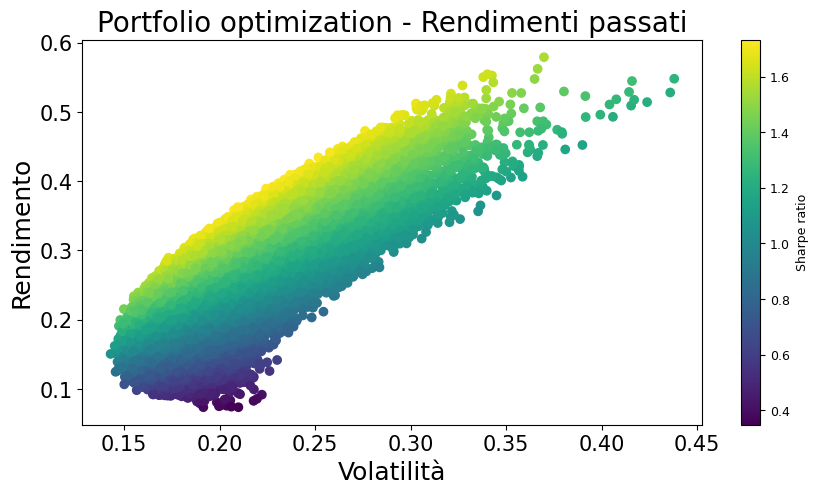

In [143]:
number_of_portfolios=10**5
portfolio_returns = []
portfolio_risks = []
sharpe_ratios = []
portfolio_weights = []

def portfolio_analitico(rend):
    portfolio_returns = []
    portfolio_risks = []
    sharpe_ratios = []
    portfolio_weights = []
    for portfolio in range(number_of_portfolios):
        weights = np.random.random_sample(len(rend.columns))
        weights = np.round((weights / np.sum(weights)), 3)
        portfolio_weights.append(weights)
        annualized_return = np.sum(avg_returns * weights)
        portfolio_returns.append(annualized_return)
        portfolio_variance = np.dot(weights.T, np.dot(cov_mat, weights))
        portfolio_standard_deviation = np.sqrt(portfolio_variance)
        portfolio_risks.append(portfolio_standard_deviation)
        sharpe_ratio = (annualized_return - rf) / portfolio_standard_deviation
        sharpe_ratios.append(sharpe_ratio)
    return np.array(portfolio_returns), np.array(portfolio_risks), np.array(sharpe_ratios), portfolio_weights

portfolio_returns, portfolio_risks, sharpe_ratios, portfolio_weights = portfolio_analitico(rendimento_semplice_mensile)
#portfoglio metrics

portfolio_metrics = [portfolio_returns, portfolio_risks, sharpe_ratios, portfolio_weights]
portfolios_df = pd.DataFrame(portfolio_metrics).T
portfolios_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']

min_risk = portfolios_df.iloc[portfolios_df['Risk'].astype(float).idxmin()]
highest_return = portfolios_df.iloc[portfolios_df['Return'].astype(float).idxmax()]
highest_sharpe = portfolios_df.iloc[portfolios_df['Sharpe'].astype(float).idxmax()]

print('Highest Sharpe ratio')
print(highest_sharpe)
print('')

print('Lowest risk')
print(min_risk)
print('')

print('Highest Sharpe ratio')
print(highest_sharpe)

plt.figure(figsize = (10,5))
plt.scatter(portfolio_risks, portfolio_returns, 
           c = (portfolio_returns - rf)/ portfolio_risks)
plt.title('Portfolio optimization - Rendimenti passati', fontsize = 20)
plt.xlabel('Volatilità', fontsize = 18)
plt.ylabel('Rendimento', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.colorbar(label = 'Sharpe ratio')
plt.show()

           AMD       CVX       JNJ      NVDA       PFE     XOM
^GSPC  0.25265  0.147967  0.076705  0.196635  0.093209  0.1317
Highest Sharpe ratio
Return                                       0.397627
Risk                                         0.228842
Sharpe                                       1.735183
Weights    [0.127, 0.006, 0.321, 0.424, 0.117, 0.004]
Name: 78157, dtype: object

Lowest risk
Return                                      0.178405
Risk                                        0.144945
Sharpe                                      1.227091
Weights    [0.012, 0.031, 0.581, 0.093, 0.24, 0.043]
Name: 3426, dtype: object

Highest Sharpe ratio
Return                                       0.397627
Risk                                         0.228842
Sharpe                                       1.735183
Weights    [0.127, 0.006, 0.321, 0.424, 0.117, 0.004]
Name: 78157, dtype: object


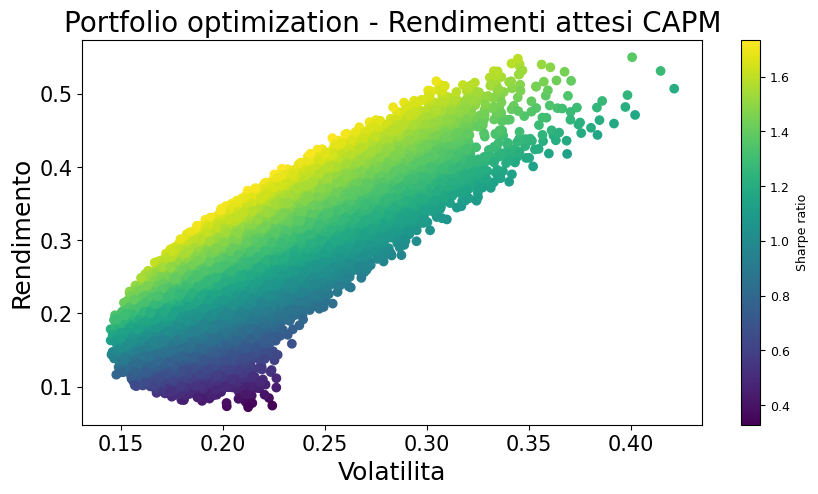

In [141]:
rend_port=rend_attesi.to_frame().transpose().drop(['^GSPC'], axis=1)
print(rend_port)
portfolio_returns, portfolio_risks, sharpe_ratios, portfolio_weights = portfolio_analitico(rend_port)
#portfoglio metrics

portfolio_metrics = [portfolio_returns, portfolio_risks, sharpe_ratios, portfolio_weights]
portfolios_df = pd.DataFrame(portfolio_metrics).T
portfolios_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']

min_risk = portfolios_df.iloc[portfolios_df['Risk'].astype(float).idxmin()]
highest_return = portfolios_df.iloc[portfolios_df['Return'].astype(float).idxmax()]
highest_sharpe = portfolios_df.iloc[portfolios_df['Sharpe'].astype(float).idxmax()]

print('Highest Sharpe ratio')
print(highest_sharpe)
print('')

print('Lowest risk')
print(min_risk)
print('')

print('Highest Sharpe ratio')
print(highest_sharpe)

plt.figure(figsize = (10,5))
plt.scatter(portfolio_risks, portfolio_returns, 
           c = (portfolio_returns - rf)/ portfolio_risks)
plt.title('Portfolio optimization - Rendimenti attesi CAPM', fontsize = 20)
plt.xlabel('Volatilita', fontsize = 18)
plt.ylabel('Rendimento', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.colorbar(label = 'Sharpe ratio')
plt.show()

### Frontiera efficiente con il metodo Monte Carlo

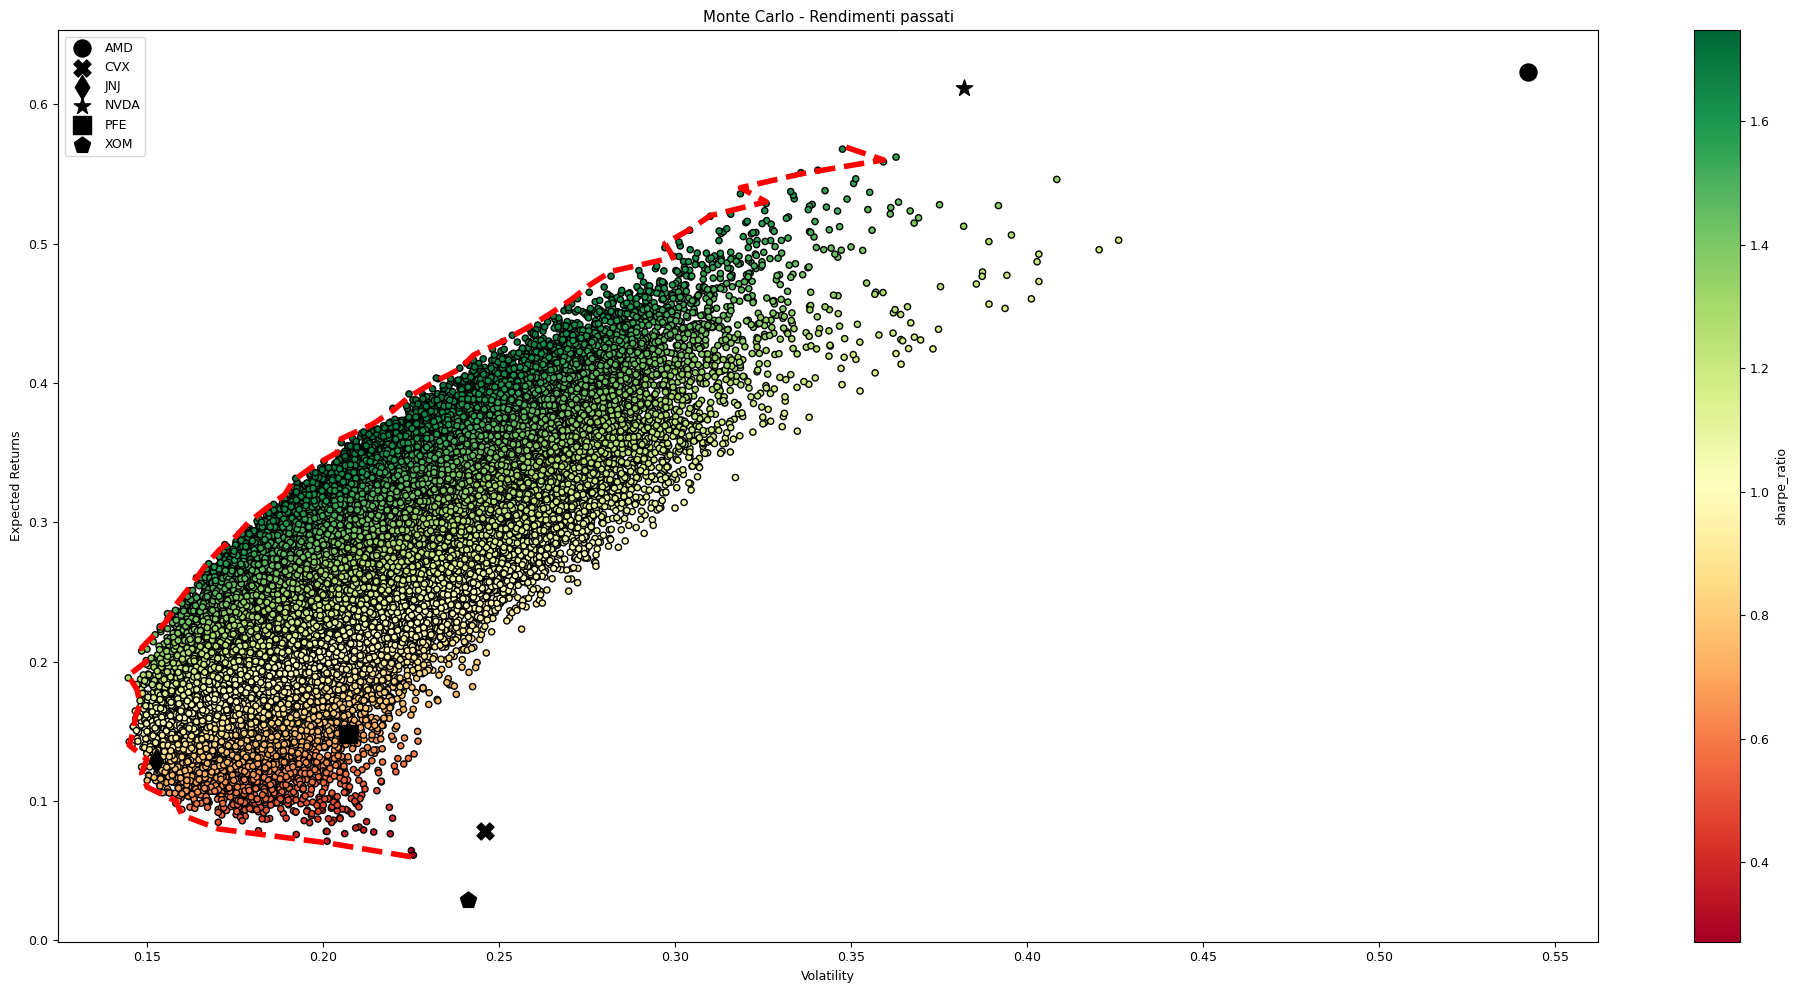

In [133]:

np.random.seed(42)
weights = np.random.random(size=(number_of_portfolios, 6))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

def funzione(avg_returns, cov_mat):
    portf_rtns = np.dot(weights, avg_returns)

    portf_vol = []
    for i in range(0, len(weights)):
        portf_vol.append(np.sqrt(np.dot(weights[i].T, 
                                        np.dot(cov_mat, weights[i]))))
    portf_vol = np.array(portf_vol)  
    portf_sharpe_ratio = portf_rtns / portf_vol

    portf_results_df = pd.DataFrame({'returns': portf_rtns,
                                    'volatility': portf_vol,
                                 'sharpe_ratio': portf_sharpe_ratio})

    n_points = 100
    portf_vol_ef = []
    indices_to_skip = []

    portf_rtns_ef = np.linspace(portf_results_df.returns.min(), 
                                portf_results_df.returns.max(), 
                            n_points)
    portf_rtns_ef = np.round(portf_rtns_ef, 2)    
    portf_rtns = np.round(portf_rtns, 2)

    for point_index in range(n_points):
        if portf_rtns_ef[point_index] not in portf_rtns:
            indices_to_skip.append(point_index)
            continue
        matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
        portf_vol_ef.append(np.min(portf_vol[matched_ind]))
        
    portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

    MARKS = ['o', 'X', 'd', '*', 's', 'p']
    fig, ax = plt.subplots()
    portf_results_df.plot(kind='scatter', x='volatility', 
                        y='returns', c='sharpe_ratio',
                        cmap='RdYlGn', edgecolors='black', 
                        ax=ax)
    ax.set(xlabel='Volatility', 
        ylabel='Expected Returns', 
        title='Monte Carlo - Rendimenti passati')
    ax.plot(portf_vol_ef, portf_rtns_ef, '--', color='red', linewidth=4)
    for asset_index in range(6):
        ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]), 
                    y=avg_returns[asset_index], 
                    marker=MARKS[asset_index], 
                    s=150, 
                    color='black',
                    label=rendimento_semplice_mensile.columns[asset_index])
    ax.legend()
    # cambia dimensione subplots
    fig.set_size_inches(20, 10)

    plt.tight_layout()

    plt.show()
    return portf_results_df

portf_results_df=funzione(avg_returns, cov_mat)

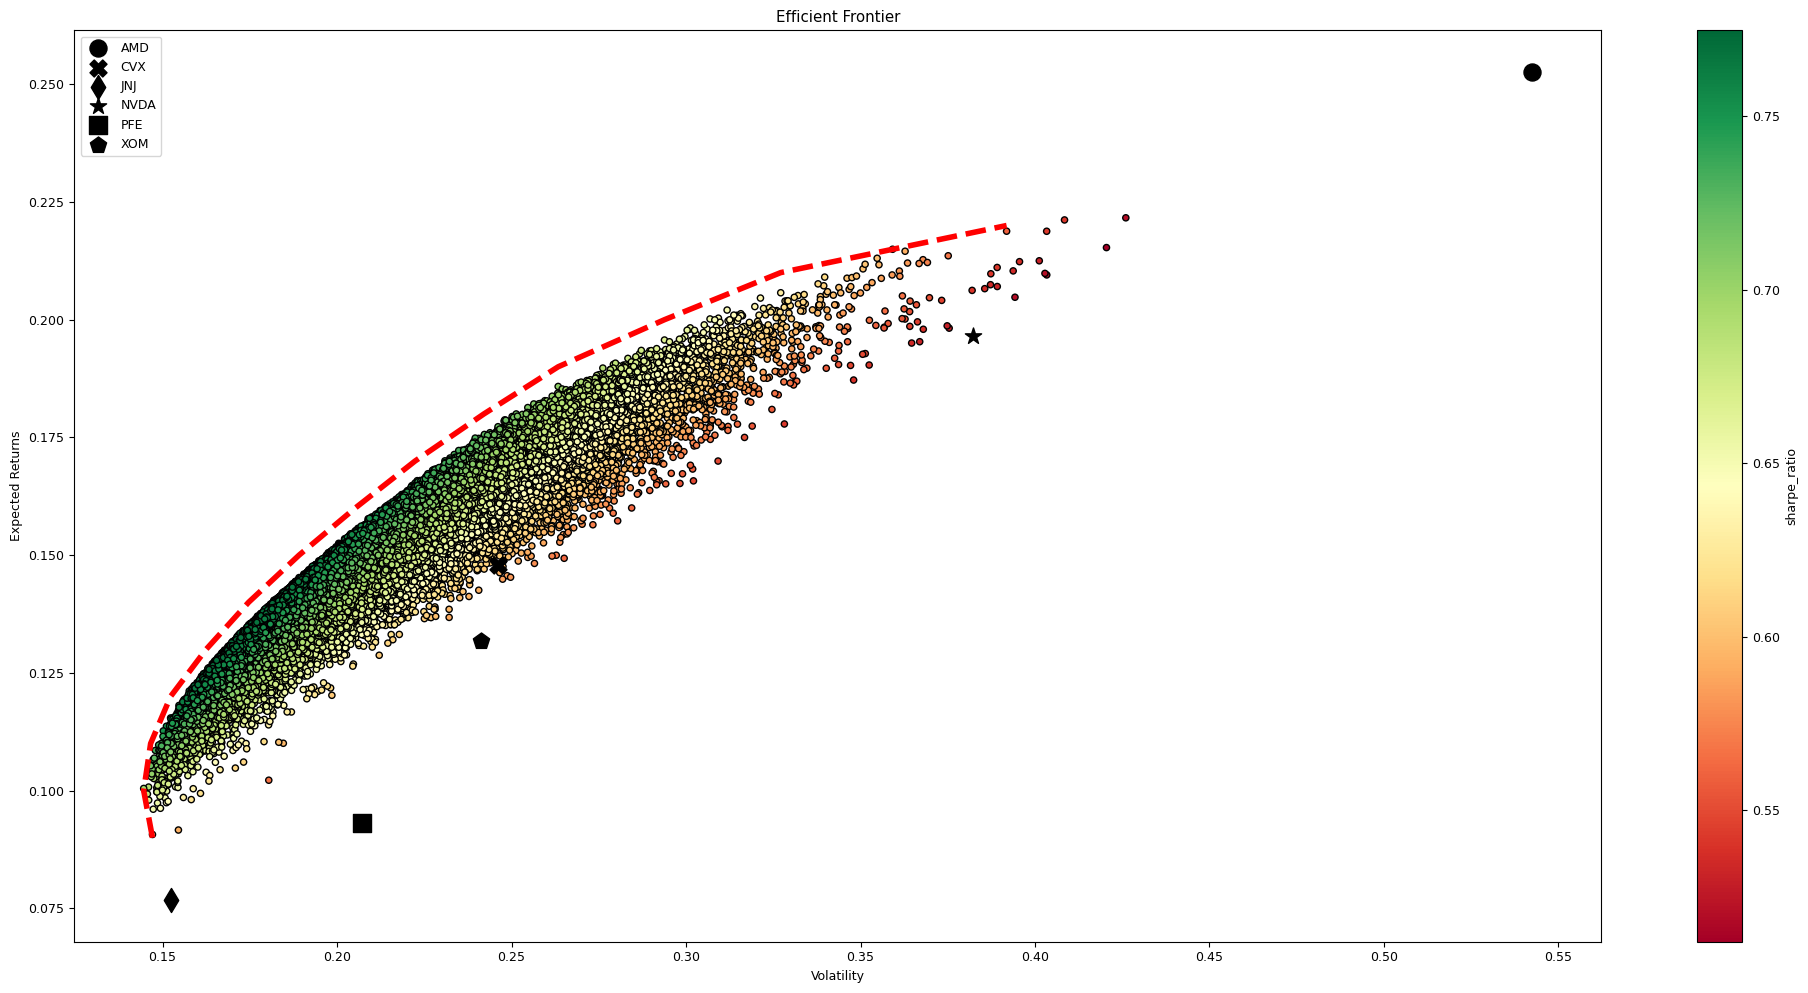

In [127]:
portf_results_df_beta=funzione(rend_attesi[:6], cov_mat)

Portafoglio con miglior sharpe ratio

In [138]:
max_sharpe_ind = np.argmax(portf_results_df.sharpe_ratio)
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]

min_vol_ind = np.argmin(portf_results_df.volatility)
min_vol_portf = portf_results_df.loc[min_vol_ind]

max_sharpe_ind_beta = np.argmax(portf_results_df_beta.sharpe_ratio)
max_sharpe_portf_beta = portf_results_df_beta.loc[max_sharpe_ind_beta]

min_vol_ind_beta = np.argmin(portf_results_df_beta.volatility)
min_vol_portf_beta = portf_results_df_beta.loc[min_vol_ind_beta]

In [129]:
print('Portafoglio con sharpe ratio migliore')
print('\nPerformance')
for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\n\nPesi')
for x, y in zip(rendimento_semplice_mensile.columns, weights[np.argmax(portf_results_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Portafoglio con sharpe ratio migliore

Performance
returns: 39.21% volatility: 22.44% sharpe_ratio: 174.75% 

Pesi
AMD: 7.39% CVX: 0.28% JNJ: 42.85% NVDA: 46.96% PFE: 2.33% XOM: 0.18% 

In [130]:
print('Minimum Volatility portfolio ----')
print('Performance')
for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(rendimento_semplice_mensile.columns, weights[np.argmin(portf_results_df.volatility)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum Volatility portfolio ----
Performance
returns: 18.84% volatility: 14.46% sharpe_ratio: 130.28% 
Weights
AMD: 0.34% CVX: 4.00% JNJ: 59.57% NVDA: 12.43% PFE: 19.76% XOM: 3.90% 

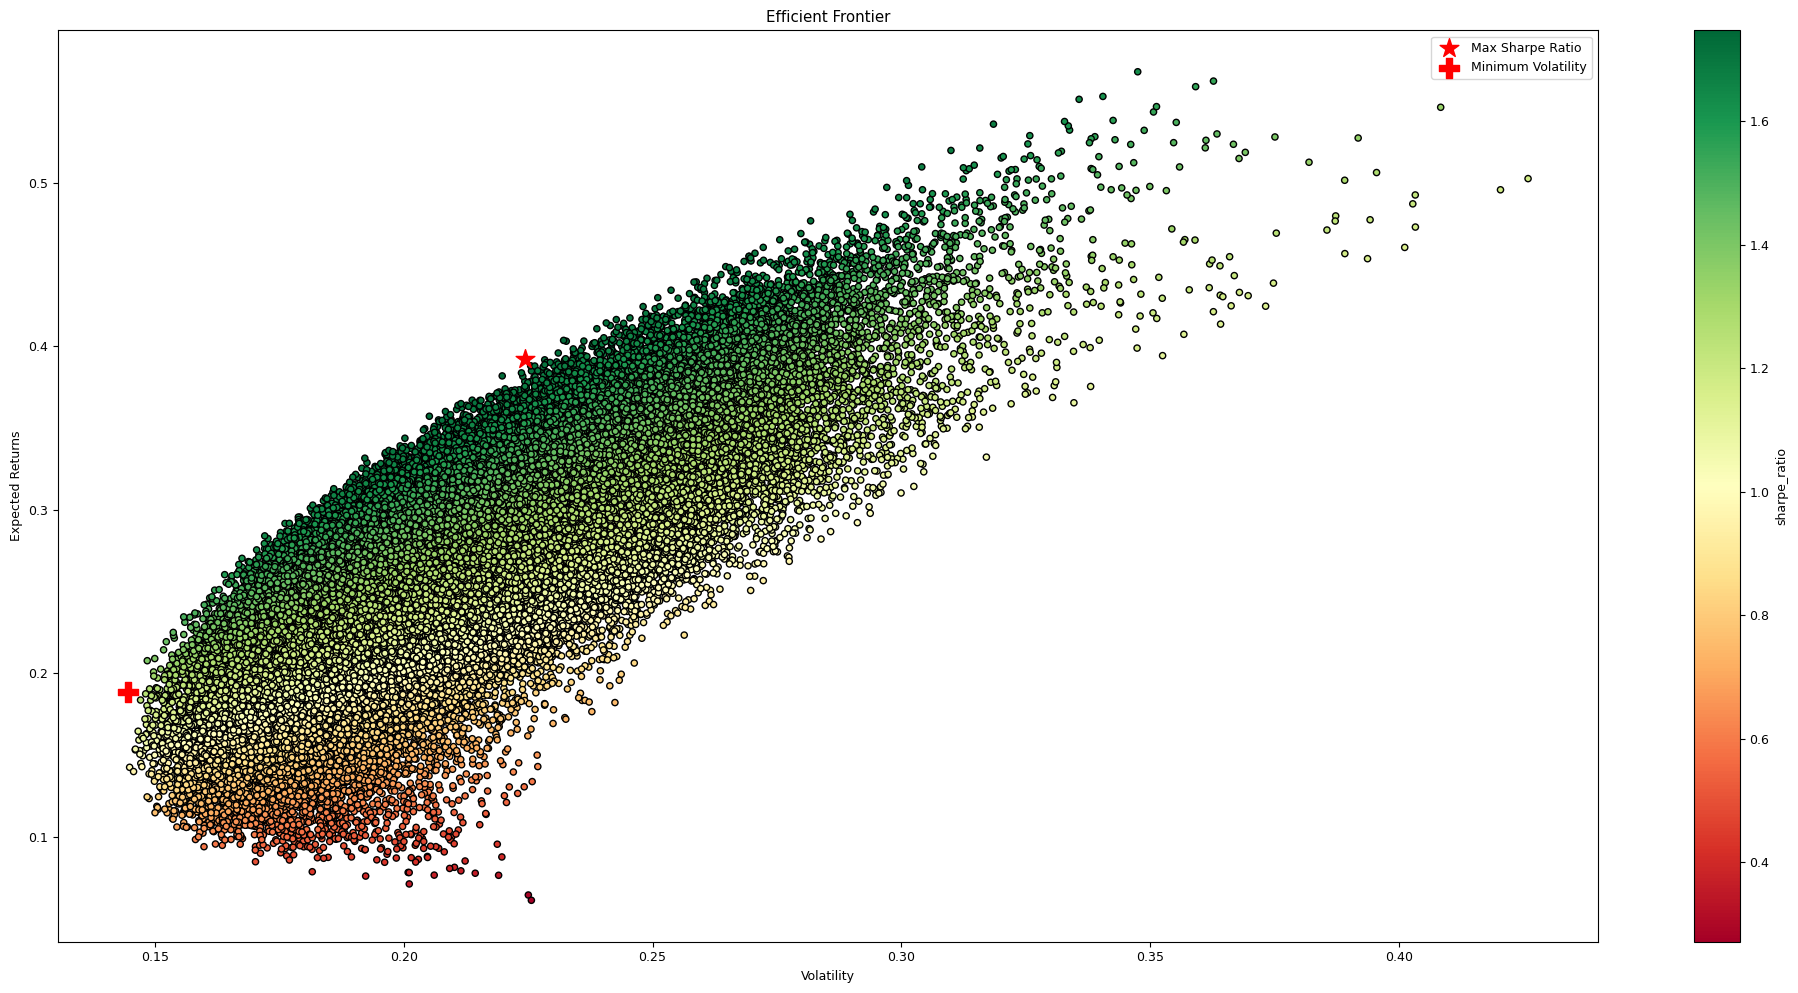

In [131]:
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.scatter(x=max_sharpe_portf.volatility, 
           y=max_sharpe_portf.returns, 
           c='red', marker='*', 
           s=200, label='Max Sharpe Ratio')
ax.scatter(x=min_vol_portf.volatility, 
           y=min_vol_portf.returns, 
           c='red', marker='P', 
           s=200, label='Minimum Volatility')
ax.set(xlabel='Volatility', ylabel='Expected Returns', 
       title='Efficient Frontier')
ax.legend()

fig.set_size_inches(20, 10)
plt.tight_layout()

plt.show()

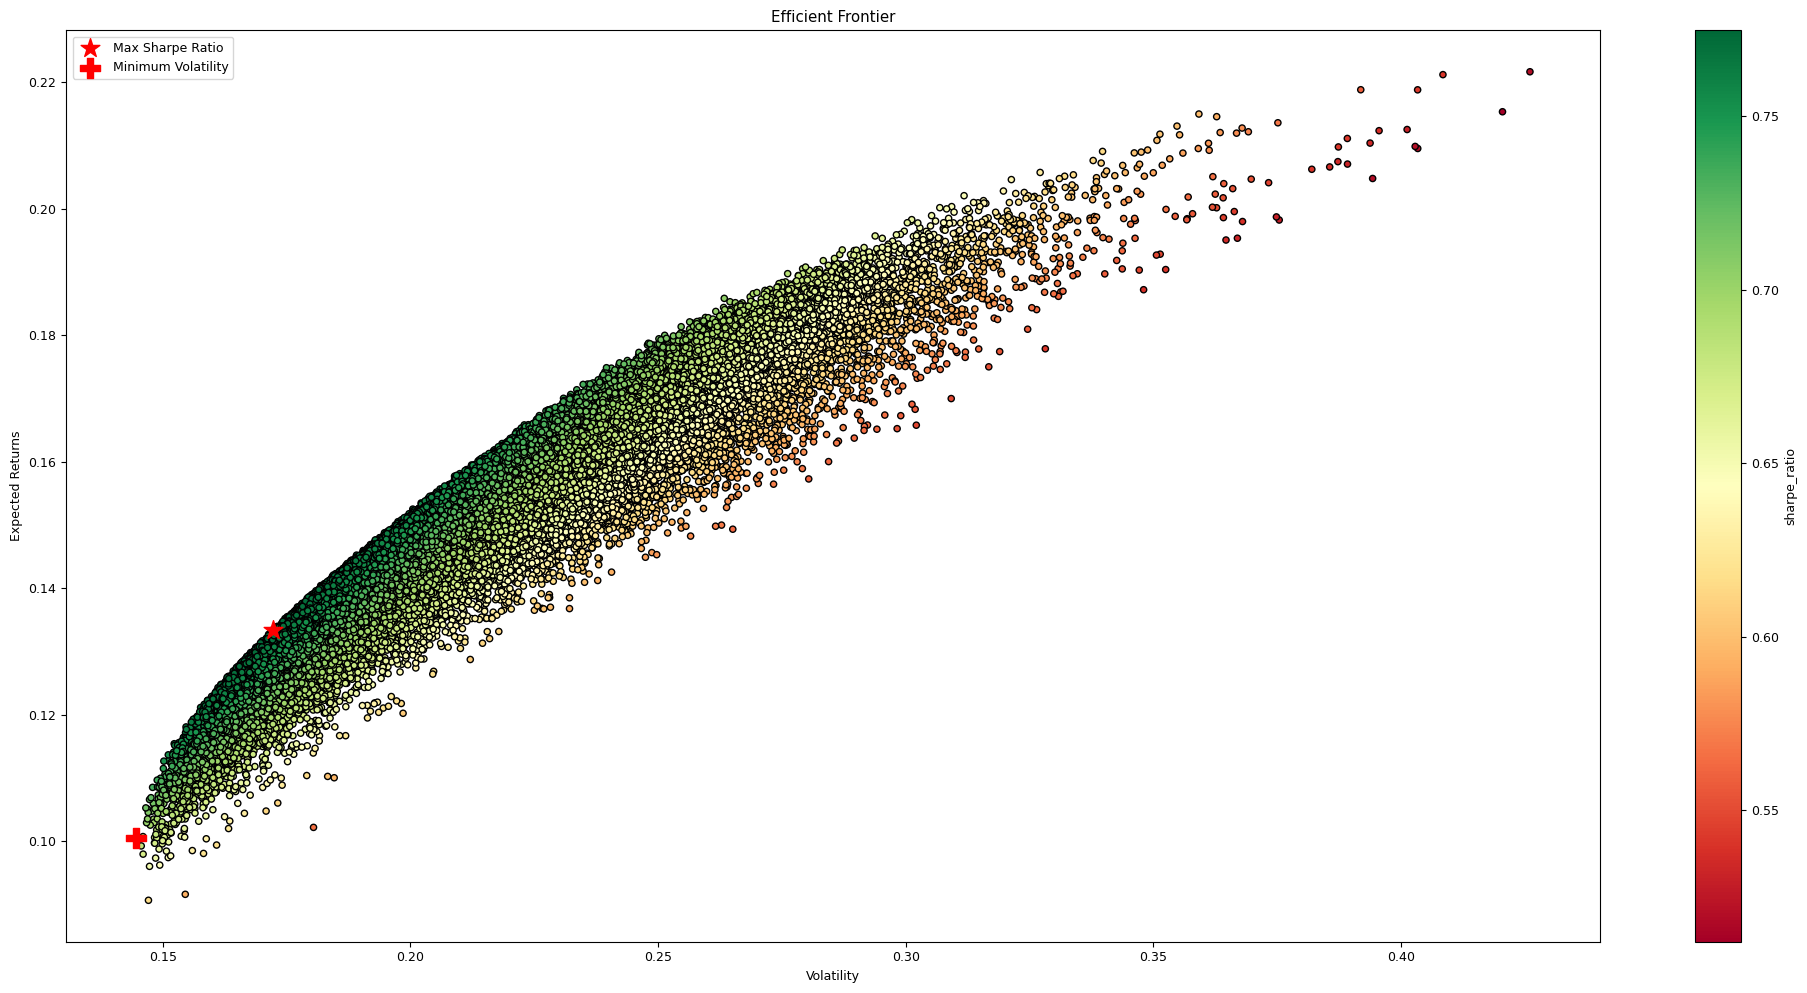

In [139]:
fig, ax = plt.subplots()
portf_results_df_beta.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.scatter(x=max_sharpe_portf_beta.volatility, 
           y=max_sharpe_portf_beta.returns, 
           c='red', marker='*', 
           s=200, label='Max Sharpe Ratio')
ax.scatter(x=min_vol_portf_beta.volatility, 
           y=min_vol_portf_beta.returns, 
           c='red', marker='P', 
           s=200, label='Minimum Volatility')
ax.set(xlabel='Volatility', ylabel='Expected Returns', 
       title='Efficient Frontier')
ax.legend()

fig.set_size_inches(20, 10)
plt.tight_layout()

plt.show()

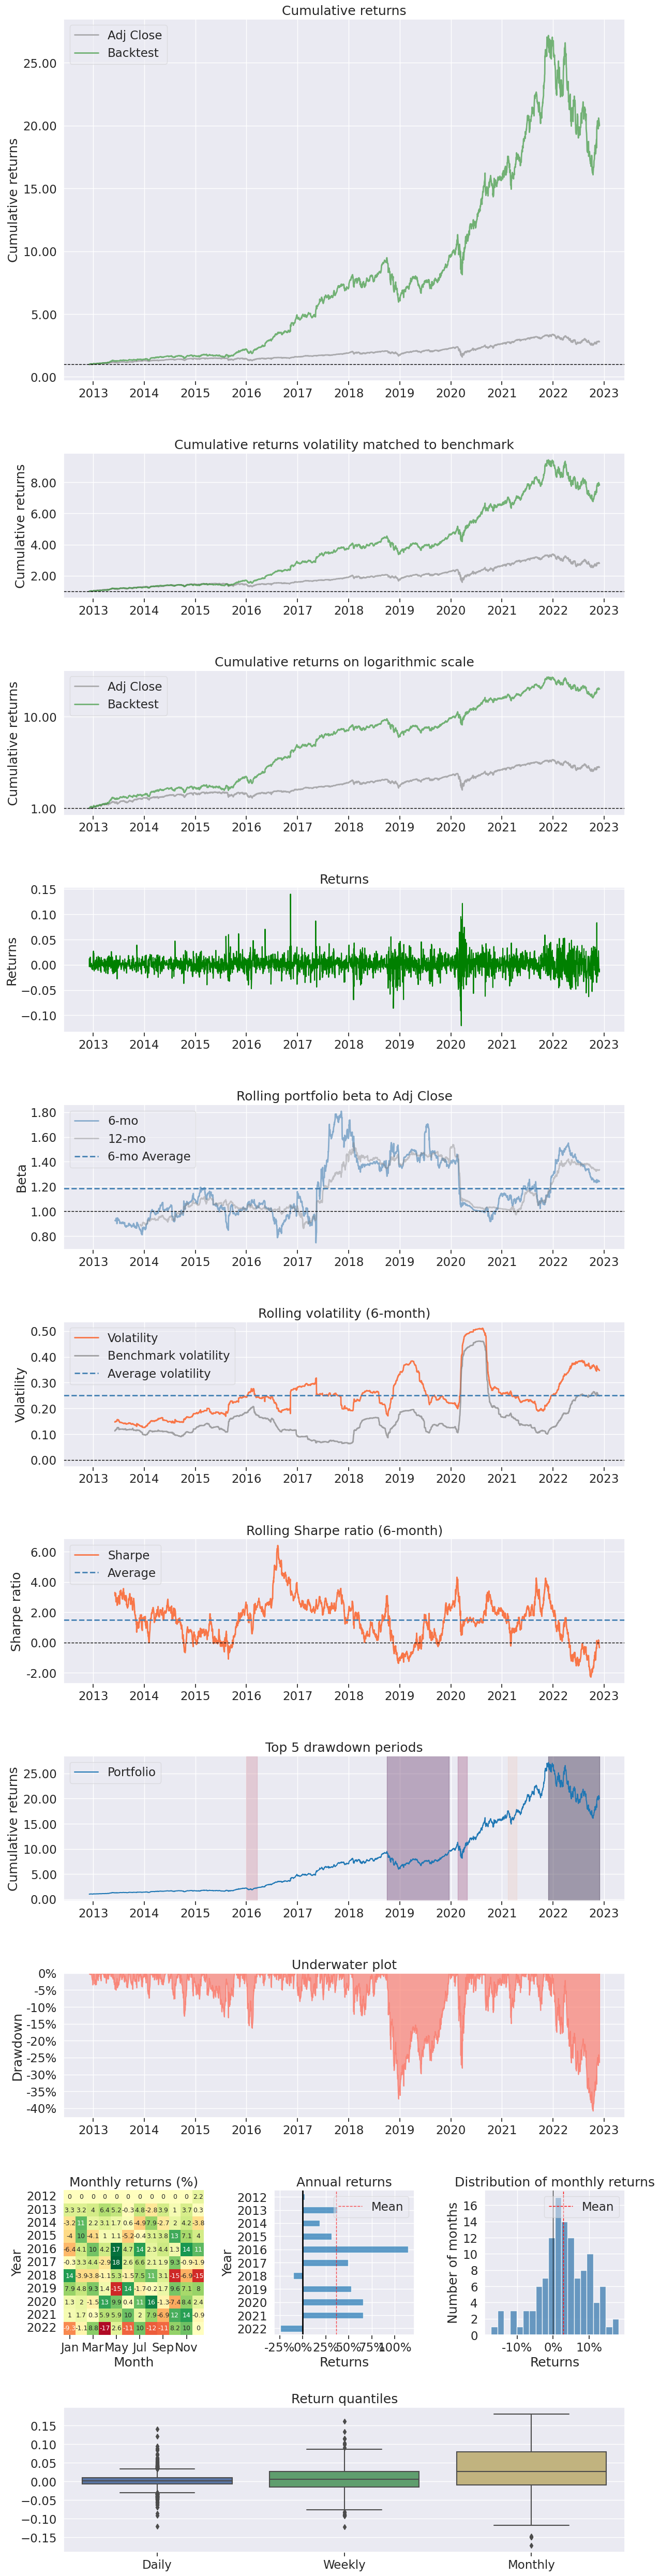

In [132]:
n_assets = 6
benchmark = market_benchmark_SP500.pct_change().dropna()
rend= dataframe.pct_change().dropna()

portfolio_weights = n_assets * [1 / n_assets]
portfolio_returns = pd.Series(np.dot(weights[np.argmax(portf_results_df.sharpe_ratio)], rend.T), index=rend.index)
pf.create_returns_tear_sheet(portfolio_returns, benchmark_rets=benchmark)